# Exploratory Data Analysis -- IMDB-Movies Data

# Table of Contents
1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Graphical representation of critics ratings (Metascore) based on audience ratings (Rating)](#section401)<br/>
    - 4.2 [4.2 Graphical representation of the Metascore according to the duration of the film.](#section402)
    - 4.3 [Graphical representation of the Revenue of the films according to the Rating from audience](#section403)<br/>
    - 4.4 [Graphic representation of the Revenue of the films according to the Metascore](#section404)<br/>
    - 4.5 [Analysis of Genre](#section405)<br/>
    - 4.6 [Actor Analysis](#section406)<br/>
    - 4.7 [Revenue Analysis for higher, medium and lower range](#section407)<br/>
    - 4.8 [Runtime Analysis](#section408)<br/>
    - 4.9 [Director Analysis](#section409)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
## 1. Problem Statement

<a id=section101></a>
### 1.1. Introduction

The Internet Movie Database (IMDb) is a website that serves as an online database of world cinema. This website contains a large number of public data on films such as the title of the film, the year of release of the film, the genre of the film, the audience, the rating of critics, the duration of the film, the summary of the film, actors, directors and much more. 

<a id=section102></a>
### 1.2 Description of Problem Statement

Analyze the data available on the IMDb website for movies released in the cinema between 2006 and 2016.

<a id=section2></a>

## 2. Data Description and Data Loading 

<a id=section201></a>
### 2.1 Data Source and the dataset

**Description:** Here's a data set of 1,000 most popular movies on IMDB from 2000 to 2016. 

**The Attribute information of the Dataset ::**
The data fields included are: Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore Rank Movie rank order:

1. Rank
2. Title:  The title of the film
3. Genre:  A comma-separated list of genres used to classify the film
4. Description : Brief one-sentence movie summary
5. Director : The name of the film's director
6. Actors : A comma-separated list of the main stars of the film
7. Year : The year that the film released as an integer.
8. Runtime (Minutes) : The duration of the film in minutes. Rating User rating for the movie 0-10 Votes Number of votes
9. Revenue (Millions) : Movie revenue in millions
10.  Metascore:  An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.
11. Votes
12. Rating : Audience rating






- Package import

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

In [150]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


- Importing the Dataset

In [102]:
Movies_1000_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")     # Importing training dataset using pd.read_csv

Movies_1000_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding the Dataset

In [5]:
Movies_1000_data.shape   # Find out number of rows and column in the data frame. 

(1000, 12)

There are 1000 rows and 12 columns for the Breast_Cancer dataset

In [30]:
Movies_1000_data.columns   # Name of the columns in the data frame. 

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [28]:
Movies_1000_data.describe() 

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [31]:
Movies_1000_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [32]:
Movies_1000_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

Revenue column has 128 and Metascore has 64 null values.

<a id=section302></a>

### 3.2 Pre Profiling

In [33]:
pre_profile = pandas_profiling.ProfileReport(Movies_1000_data)
pre_profile.to_file(output_file="Movies_before_preprocessing.html")

**Observations from preprocessing file :**

1. Metascore has **64 (6.4%)** missing values 
2. Revenue_(Millions) has **128 (12.8%)** missing values 
3. Number of numerical variables **7** -> Metascore, Rank, Rating, Revenue_(Millions),Runtime_(Minutes),Votes, Year.
4. Number of categorical variable **5** -> Actors, Description, Director, Genre, Title.
5. Number of Text unique variable **1** -> Description

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __Metascore__.
    - Replacing missing values of **Revenue (Millions)** with median values.

##### Replacing missing entries of __Metascore__.

As per the preprocessing file the Rating and Metascore is positively correlated. Creating Rating_Range bins for grouping rating range, this will be used to calculate median of Metascore based on particular rating range to replace missing value in the Metastore column. 

In [121]:
# Rating bin
Movies_1000_data.loc[(Movies_1000_data['Rating'] >=1) & (Movies_1000_data['Rating']<=3), 'Rating_Range']= 'Rating_1'
Movies_1000_data.loc[(Movies_1000_data['Rating'] >3) & (Movies_1000_data['Rating']<=5), 'Rating_Range']= 'Rating_2'
Movies_1000_data.loc[(Movies_1000_data['Rating'] >5) & (Movies_1000_data['Rating']<=6.5), 'Rating_Range']= 'Rating_3'
Movies_1000_data.loc[(Movies_1000_data['Rating'] >6.5) & (Movies_1000_data['Rating']<=8), 'Rating_Range']= 'Rating_4'
Movies_1000_data.loc[(Movies_1000_data['Rating'] >8) & (Movies_1000_data['Rating']<=10), 'Rating_Range']= 'Rating_5'
Movies_1000_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Rating_5
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Rating_4
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Rating_4
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Rating_4
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Rating_3


- Find median of rating range 5

In [122]:
#Movies_data.loc[Movies_data['Rating_Range'] == 'Rating_5']
rating_range5 = Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_5']['Metascore']
#rating_range5.isnull().sum() # 5 null values
range5_median=rating_range5.median()
range5_median

78.0

In [123]:
Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_5') & (Movies_1000_data['Metascore'].isnull()), 'Metascore'] = 78

In [124]:
#Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_5') & (Movies_1000_data['Metascore'].isnull())]
Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_5']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Rating_5
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Rating_5
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0,Rating_5
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0,Rating_5
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,78.0,Rating_5
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Rating_5
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Rating_5
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Rating_5
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,Rating_5
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0,Rating_5


- There were total **5 null values** for rating_range5, were replaced with the Metascore median value **78** at rating_range5.

- Find median value for **rating_range4**

In [125]:
#Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_4']
#Movies_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_5']
rating_range4 = Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_4']['Metascore']
rating_range4.isnull().sum() # 34 null values
range4_median=rating_range4.median()
range4_median

66.0

In [126]:
Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_4') & (Movies_1000_data['Metascore'].isnull()), 'Metascore'] = 66

In [127]:
#Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_4') & (Movies_1000_data['Metascore'].isnull())]
Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_4']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Rating_4
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Rating_4
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Rating_4
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Rating_4
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Rating_4
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Rating_4
11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.27,74.0,Rating_4
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,Rating_4
13,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0,Rating_4
15,16,The Secret Life of Pets,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0,Rating_4


- There were total **34 null values** for rating_range4, were replaced with the Metascore median value **66** at rating_range4.

- Find median value for **rating_range3**

In [128]:
#Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_3']
#Movies_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_3']
rating_range3 = Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_3']['Metascore']
rating_range3.isnull().sum() # 20 null values
range3_median=rating_range3.median()
range3_median

47.0

In [130]:
Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_3') & (Movies_1000_data['Metascore'].isnull()), 'Metascore'] = 47

In [131]:
#Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_3') & (Movies_1000_data['Metascore'].isnull())]
Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_3']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Rating_3
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Rating_3
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Rating_3
14,15,Colossal,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0,Rating_3
23,24,Trolls,"Animation,Adventure,Comedy","After the Bergens invade Troll Village, Poppy,...",Walt Dohrn,"Anna Kendrick, Justin Timberlake,Zooey Deschan...",2016,92,6.5,38552,153.69,56.0,Rating_3
24,25,Independence Day: Resurgence,"Action,Adventure,Sci-Fi",Two decades after the first Independence Day i...,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman,Ma...",2016,120,5.3,127553,103.14,32.0,Rating_3
28,29,Bad Moms,Comedy,When three overworked and under-appreciated mo...,Jon Lucas,"Mila Kunis, Kathryn Hahn, Kristen Bell,Christi...",2016,100,6.2,66540,113.08,60.0,Rating_3
29,30,Assassin's Creed,"Action,Adventure,Drama",When Callum Lynch explores the memories of his...,Justin Kurzel,"Michael Fassbender, Marion Cotillard, Jeremy I...",2016,115,5.9,112813,54.65,36.0,Rating_3
30,31,Why Him?,Comedy,A holiday gathering threatens to go off the ra...,John Hamburg,"Zoey Deutch, James Franco, Tangie Ambrose,Cedr...",2016,111,6.3,48123,60.31,39.0,Rating_3
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Rating_3


- There were total **20 null values** for rating_range3, were replaced with the Metascore median value **47** at rating_range3.

- Find median value for **rating_range2**

In [132]:
#Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_2']
#Movies_data.loc[Movies_data['Rating_Range'] == 'Rating_2']
rating_range2 = Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_2']['Metascore']
rating_range2.isnull().sum() # 4 null values
range2_median=rating_range2.median()
range2_median

37.5

In [133]:
Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_2') & (Movies_1000_data['Metascore'].isnull()), 'Metascore'] = 37.5

In [134]:
#Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_2') & (Movies_1000_data['Metascore'].isnull())]
Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_2']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,37.5,Rating_2
49,50,The Last Face,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,NaN,16.0,Rating_2
63,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,166.15,46.0,Rating_2
155,156,Aliens vs Predator - Requiem,"Action,Horror,Sci-Fi",Warring alien and predator races descend on a ...,Colin Strause,"Reiko Aylesworth, Steven Pasquale,Shareeka Epp...",2007,94,4.7,97618,41.80,29.0,Rating_2
229,230,Rupture,"Horror,Sci-Fi,Thriller",A single mom tries to break free from a myster...,Steven Shainberg,"Noomi Rapace, Michael Chiklis, Kerry Bishé,Pet...",2016,102,4.8,2382,NaN,35.0,Rating_2
237,238,The Disappointments Room,"Drama,Horror,Thriller",A mother and her young son release unimaginabl...,D.J. Caruso,"Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...",2016,85,3.9,4895,2.41,31.0,Rating_2
250,251,Bonjour Anne,"Comedy,Drama,Romance",Anne is at a crossroads in her life. Long marr...,Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,4.9,178,0.32,50.0,Rating_2
265,266,Knock Knock,"Drama,Horror,Thriller",A devoted father helps two stranded young wome...,Eli Roth,"Keanu Reeves, Lorenza Izzo, Ana de Armas, Aaro...",2015,99,4.9,53441,0.03,53.0,Rating_2
269,270,Satanic,Horror,Four friends on their way to Coachella stop of...,Jeffrey G. Hunt,"Sarah Hyland, Steven Krueger, Justin Chon, Cla...",2016,85,3.7,2384,NaN,37.5,Rating_2
393,394,Whisky Galore,"Comedy,Romance",Scottish islanders try to plunder cases of whi...,Gillies MacKinnon,"Tim Pigott-Smith, Naomi Battrick, Ellie Kendri...",2016,98,5.0,102,NaN,43.0,Rating_2


- There were total **4 null values** for rating_range2, were replaced with the Metascore median value **37.5** at rating_range2.

- Find median value for **rating_range1**

In [135]:
#Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_1']
#Movies_data.loc[Movies_data['Rating_Range'] == 'Rating_1']
rating_range1 = Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_1']['Metascore']
rating_range1.isnull().sum() # 4 null values
range1_median=rating_range1.median()
range1_median

30.0

In [136]:
Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_1') & (Movies_1000_data['Metascore'].isnull()), 'Metascore'] = 30

In [137]:
#Movies_1000_data.loc[(Movies_1000_data['Rating_Range'] == 'Rating_1') & (Movies_1000_data['Metascore'].isnull())]
Movies_1000_data.loc[Movies_1000_data['Rating_Range'] == 'Rating_1']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,30.0,Rating_1
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0,Rating_1
871,872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0,Rating_1


- There were total **1 null values** for rating_range2, were replaced with the Metascore median value **30** at rating_range2.

In [138]:
Movies_1000_data.Metascore.isnull().sum()

0

- All the **64 null values** of Metascore column were replaced.

##### Replacing missing values of **Revenue_(Millions)** with median values.

As per the preprocessing file the Votes and Revenue are positively correlated. 

In [139]:
Movies_1000_data['Revenue (Millions)'].isnull().sum()

128

In [140]:
# 5% --> 46 null
Movies_1000_data.loc[Movies_1000_data['Votes'] <= 1500]['Revenue (Millions)'].isnull().sum()

46

In [141]:
round((Movies_1000_data.loc[Movies_1000_data['Votes'] <= 1500]['Revenue (Millions)'].mean()),2)

10.39

In [142]:
# Repalce null values with 10.39
#Movies_1000_data.loc[(Movies_1000_data['Votes'] <= 1500) & (Movies_1000_data['Revenue (Millions)'].isnull()), 'Revenue (Millions)'] #-->It is show all Nan values with location
Movies_1000_data.loc[(Movies_1000_data['Votes'] <= 1500) & (Movies_1000_data['Revenue (Millions)'].isnull()), 'Revenue (Millions)'] = 10.39

In [143]:
Movies_1000_data.loc[Movies_1000_data['Votes'] <= 1500]['Revenue (Millions)'].isnull().sum() #46 null valus are replaced 

0

In [145]:
#Q1 --> 63 null values
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 1500) & (Movies_1000_data['Votes'] <= 37000)]['Revenue (Millions)'].isnull().sum()

63

In [146]:
round((Movies_1000_data.loc[(Movies_1000_data['Votes'] > 1500) & (Movies_1000_data['Votes'] <= 37000)]['Revenue (Millions)'].mean()),2)
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 1500) & (Movies_1000_data['Votes'] <= 37000)]
#round(mean_1,2)

13.37

In [147]:
#Replace null value with 13.37
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 1500) & (Movies_1000_data['Votes'] <= 37000) & (Movies_1000_data['Revenue (Millions)'].isnull()),'Revenue (Millions)']
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 1500) & (Movies_1000_data['Votes'] <= 37000) & (Movies_1000_data['Revenue (Millions)'].isnull()),'Revenue (Millions)'] = 13.37

In [148]:
#63 null values are replaced now
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 1500) & (Movies_1000_data['Votes'] <= 37000)]['Revenue (Millions)'].isnull().sum()

0

In [149]:
#Median --> 8 null values
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 37000) & (Movies_1000_data['Votes'] <= 110799)]['Revenue (Millions)'].isnull().sum()

8

In [150]:
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 37000) & (Movies_1000_data['Votes'] <= 110799)]
round((Movies_1000_data.loc[(Movies_1000_data['Votes'] > 37000) & (Movies_1000_data['Votes'] <= 110799)]['Revenue (Millions)'].mean()),2)

38.44

In [151]:
#Replace with 38.44
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 37000) & (Movies_1000_data['Votes'] <= 110799) & (Movies_1000_data['Revenue (Millions)'].isnull()),'Revenue (Millions)']
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 37000) & (Movies_1000_data['Votes'] <= 110799) & (Movies_1000_data['Revenue (Millions)'].isnull()),'Revenue (Millions)'] = 38.44

In [152]:
#8 null values are replaced now
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 37000) & (Movies_1000_data['Votes'] <= 110799)]['Revenue (Millions)'].isnull().sum()

0

In [153]:
#Q3 -- 9 null values
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 110799) & (Movies_1000_data['Votes'] <= 240000)]['Revenue (Millions)'].isnull().sum()

9

In [154]:
round((Movies_1000_data.loc[(Movies_1000_data['Votes'] > 110799) & (Movies_1000_data['Votes'] <= 240000)]['Revenue (Millions)'].mean()),2)

77.1

In [156]:
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 110799) & (Movies_1000_data['Votes'] <= 240000) & (Movies_1000_data['Revenue_(Millions)'].isnull()),'Revenue (Millions)']
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 110799) & (Movies_1000_data['Votes'] <= 240000) & (Movies_1000_data['Revenue (Millions)'].isnull()),'Revenue (Millions)']=77.1

In [157]:
#Replaced 9 values
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 110799) & (Movies_1000_data['Votes'] <= 240000)]['Revenue (Millions)'].isnull().sum()

0

In [159]:
#95% - 2 null values
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 240000) & (Movies_1000_data['Votes'] <= 530000)]['Revenue (Millions)'].isnull().sum()

2

In [160]:
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 240000) & (Movies_1000_data['Votes'] <= 530000) & (Movies_1000_data['Revenue (Millions)'].isnull())]
#Movies_1000_data.loc[(Movies_1000_data['Votes'] > 240000) & (Movies_1000_data['Votes'] <= 530000)]
round((Movies_1000_data.loc[(Movies_1000_data['Votes'] > 240000) & (Movies_1000_data['Votes'] <= 530000)]['Revenue (Millions)'].mean()),2)

148.88

In [161]:
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 240000) & (Movies_1000_data['Votes'] <= 530000) & (Movies_1000_data['Revenue (Millions)'].isnull()),'Revenue (Millions)'] = 148.88

In [162]:
#Replaced null values
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 240000) & (Movies_1000_data['Votes'] <= 530000)]['Revenue (Millions)'].isnull().sum()

0

In [163]:
#maximum
Movies_1000_data.loc[(Movies_1000_data['Votes'] > 530000) & (Movies_1000_data['Votes'] <= 1791916)]['Revenue (Millions)'].isnull().sum()

0

In [165]:
Movies_1000_data['Revenue (Millions)'].isnull().sum()

0

- All the **128 null values** of Revenue (Millions) were replaced by the mean value of the Revenue (Millions) quertile ranges. 

<a id=section304></a>
### 3.4 Post Profiling

In [95]:
import pandas_profiling
post_profile = pandas_profiling.ProfileReport(Movies_1000_data)
post_profile.to_file(output_file="Movies_after_preprocessing.html")

#### Understanding of Distribution of Audience Rating, Critics Rating, Runtime, Revenue, Votes and Year from post profiling fine:

- Audience Ratings: Most of the audience ratings are between 6/10 and 7/10. 
  Few of the extreme ratings from 1.9/10 to 3.710 lower side and from 8/10 to 9/10 upper side. 
- Critics Ratings (Metascore): Most critics ratings are between 60/100 and 80/100.
  Few of the extreme ratings from 11/100 to 19/100 lower side and from 95/100 to 100/100 upper side.
  **Boyhood is got critics rating 100/100 in the year 2014.**
- Duration of the movie: a large number of films have a duration of 100 minutes to 120 minutes.
  Few of the extreme values from 66 to 82 lower side and from 171 to 191 upper side.
- Movie Revenue: Most movies are worth between 0 and 100 million dollars 900 movies, from 200 to 500 million dollars 94 movies,
  **only 6 movies are above 500 million dollars.**  
- Number of votes: Most votes are between 500 and 250000 votes.
- Year: Number of movies released was increased from 2013, and **it reached to higher number in 2016.**

<a id=section4></a>
### 4 Questions

<a id=section401></a>
#### 4.1 Graphical representation of  critics ratings (Metascore) based on  audience ratings (Rating)

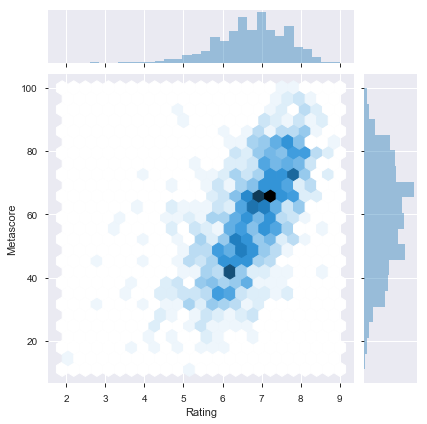

In [110]:
sns.jointplot(x='Rating', y='Metascore', data=Movies_1000_data,  kind='hex')


- We can see the high concentration of the points, where audience ratings are in agreement with critics rating. 
  As per the above graph, audience rating from 6/10 to 8/10 and the critics rating 50/100 to 80/100.
- For few of the movies there is differences in audiance rating 5.5/10 to 6.5/ 100 and critics rating below 40/100. Even for audience rating from 7/10 to 8/10, critics gave rating 30/100 to 50/100
- From the distribution, we can see in most of the cases if audience is happy they give rating 7/10, the audience rating curve is leptokurtic. 
-  Critics are not giving higher rating to all the movies, the curve for the critics rating is mesokurtic. 

<a id=section402></a>
#### 4.2 Graphical representation of the Metascore according to the duration of the film.

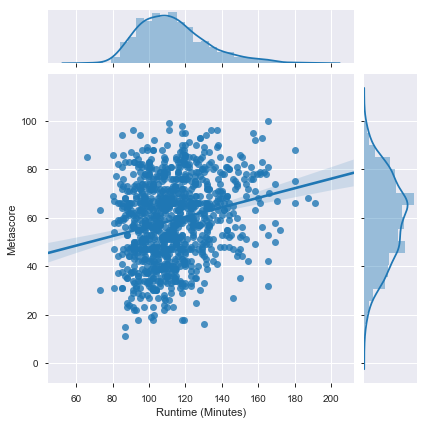

In [112]:
sns.jointplot(data=Movies_1000_data, y='Metascore', x='Runtime (Minutes)', kind = 'reg')

- On this graph, we can see that for movies between 80 minutes and 140 minutes, the ratings of the critics are more concentrated and vary between 20/100 and 98/100.

<a id=section403></a>
#### 4.3 Graphical representation of the Revenue of the films according to the Rating from audience 

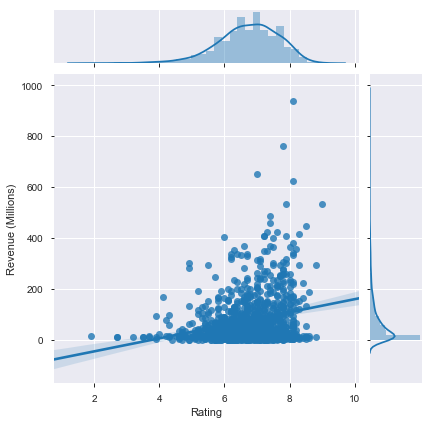

In [118]:
sns.jointplot(data=Movies_1000_data, x='Rating', y='Revenue (Millions)', kind = "reg")

- We can see from the above graph that the most concentrated part where audience rating is from 6/10 to 8/10. Most of the movies earned 10 million to 100 million. Few of them within this rating earned within the range of 200 million to 400 million. 

<a id=section404></a>
#### 4.4 Graphic representation of the Revenue of the films according to the Metascore 

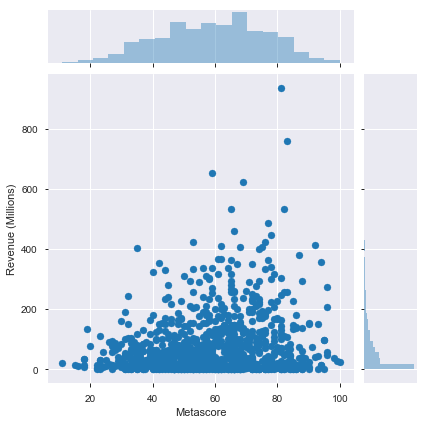

In [119]:
sns.jointplot(data=Movies_1000_data, x='Metascore', y='Revenue (Millions)')

- We can see from the graph that, the most concentrated part is from 40/100 to 80/100 of critics rating. Movies earned more money for the higher rating.     

<a id=section405></a>
#### 4.5 Analysis of Genre

In [176]:
movies_genre1 = ['Action','Adventure','Animation','Biography','Comedy']
movies_genre2 = ['Crime','Drama','Fantasy','Family','History']
movies_genre3 =['Horror','Music','Musical','Mystery','Romance']
movies_genre4 = ['Sci-Fi','Sport','Thriller','War','Western']


The total number of  Action :: 303
The total number of  Adventure :: 259
The total number of  Animation :: 49
The total number of  Biography :: 81
The total number of  Comedy :: 279


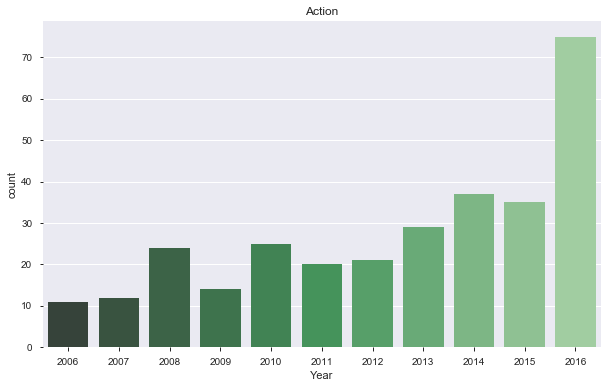

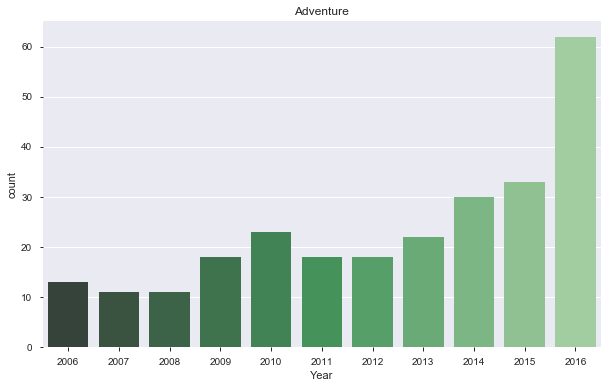

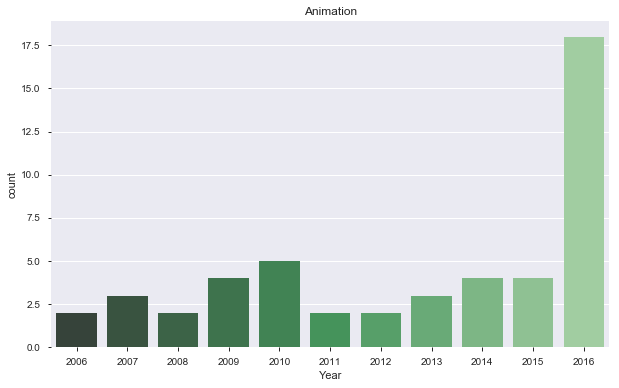

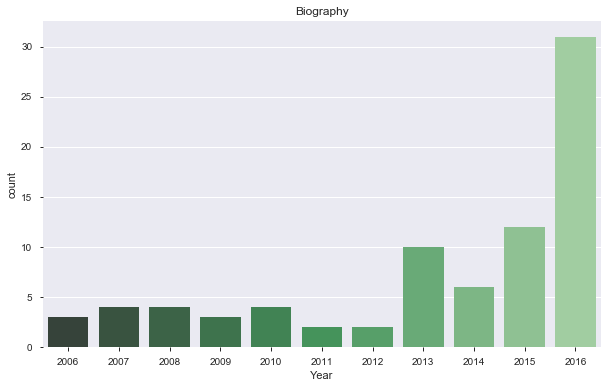

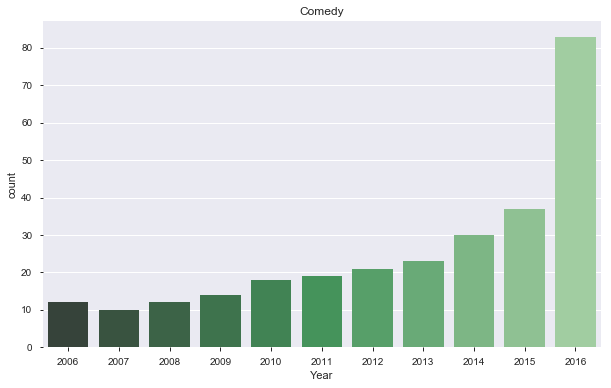

In [167]:
for genre in movies_genre1 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    print("The total number of ",genre,"::",len(Movies_1000_data[genre_df]))
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='Year', data=Movies_1000_data[genre_df], palette="Greens_d")
    plt.title(genre)

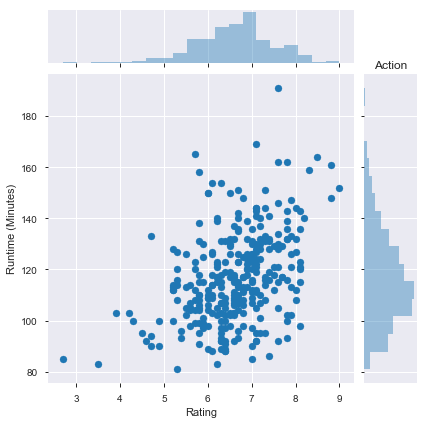

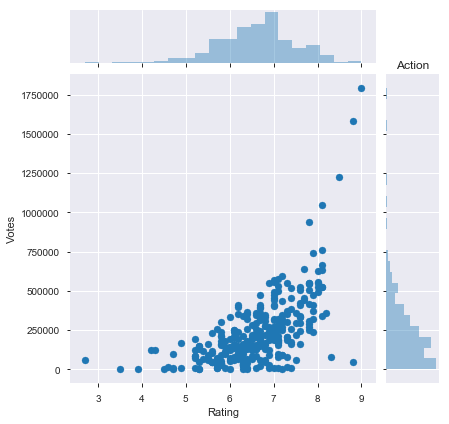

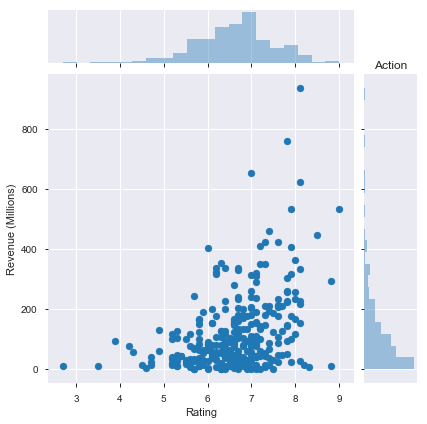

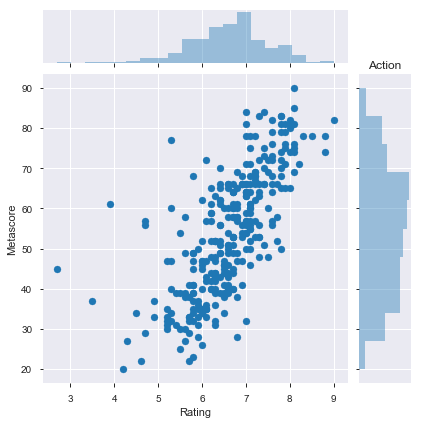

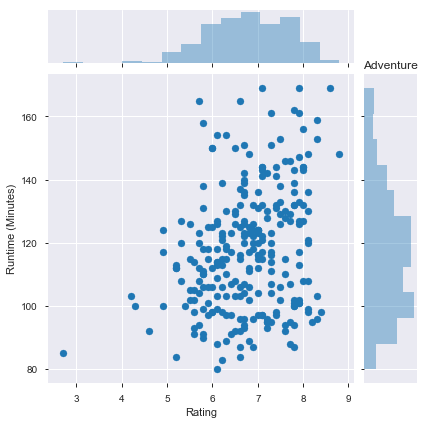

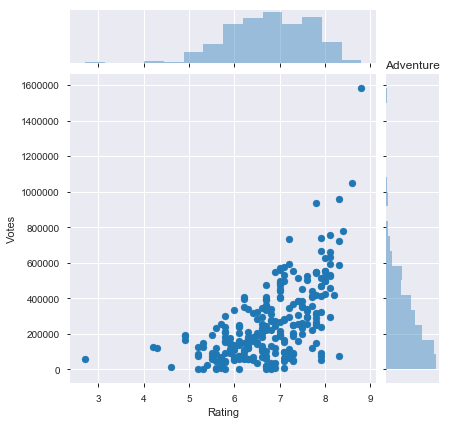

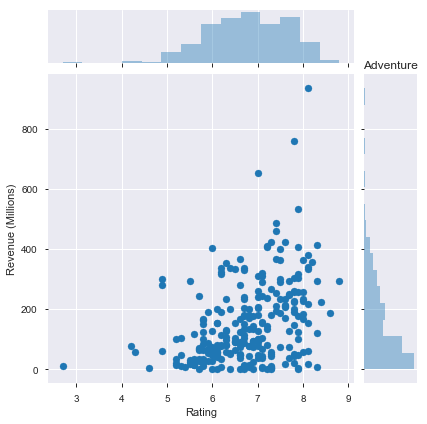

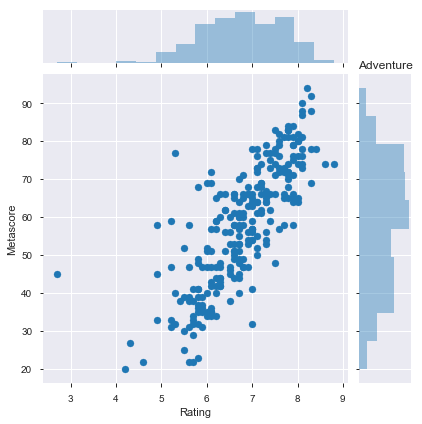

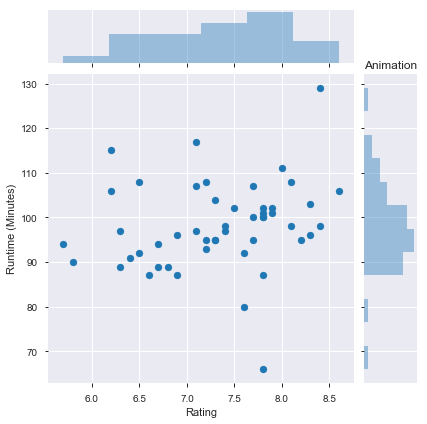

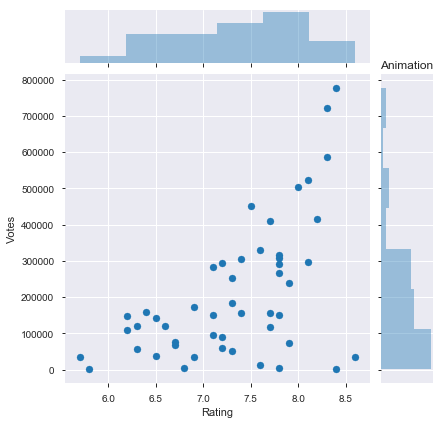

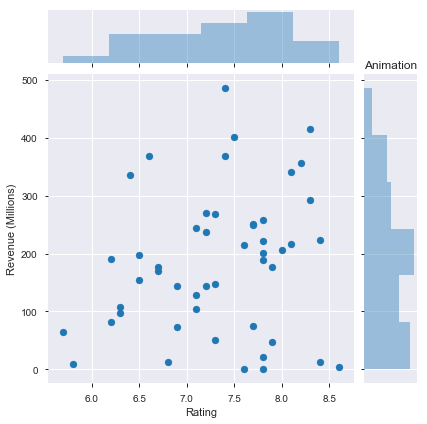

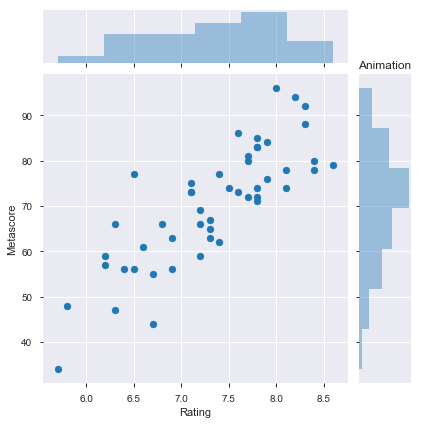

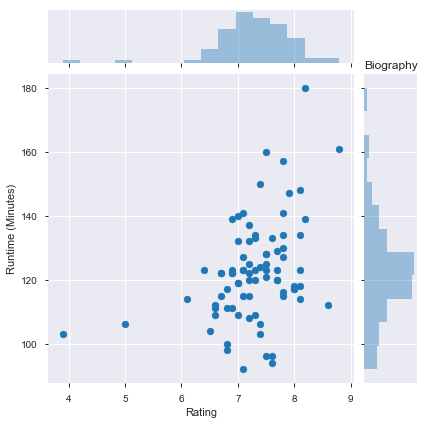

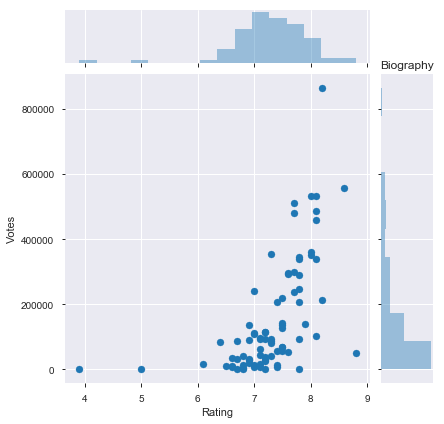

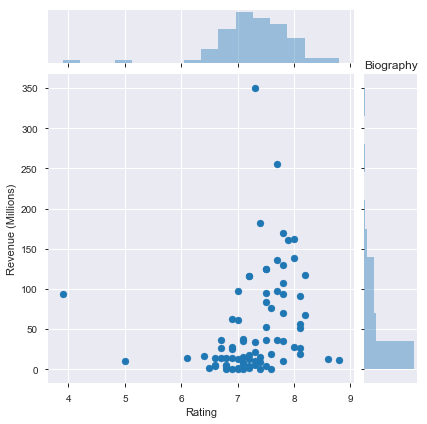

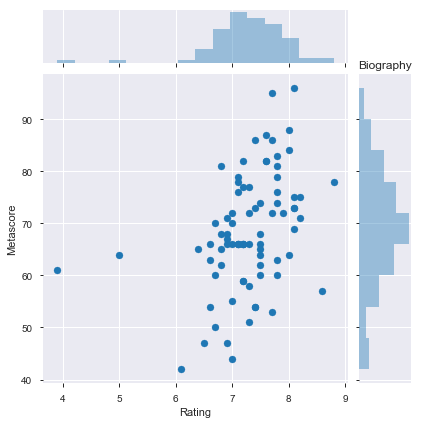

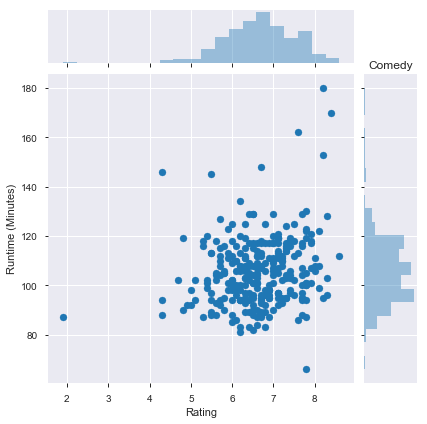

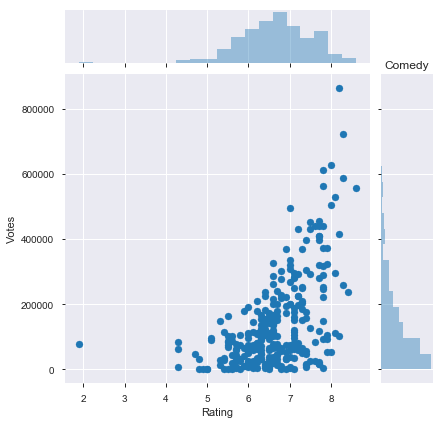

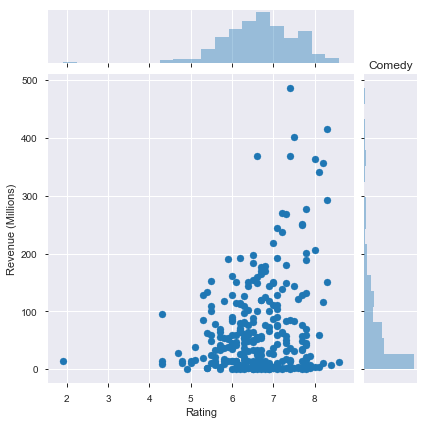

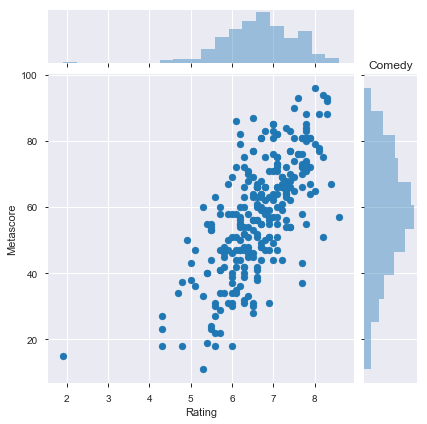

In [168]:
for genre in movies_genre1 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    compare_with_movies_rating = ['Runtime (Minutes)', 'Votes','Revenue (Millions)', 'Metascore']
    for compare in compare_with_movies_rating :  
        sns.jointplot(data=Movies_1000_data[genre_df], x='Rating', y=compare)
        plt.title(genre)

The total number of  Crime :: 150
The total number of  Drama :: 513
The total number of  Fantasy :: 101
The total number of  Family :: 51
The total number of  History :: 29


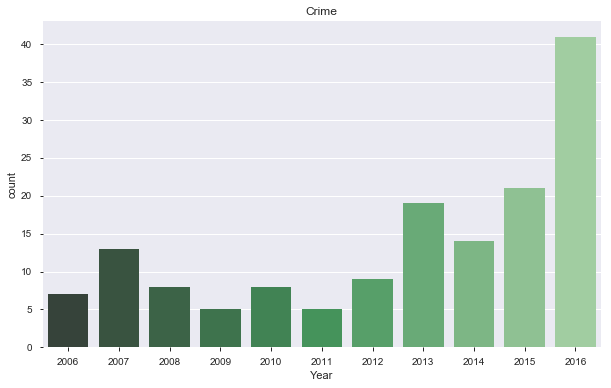

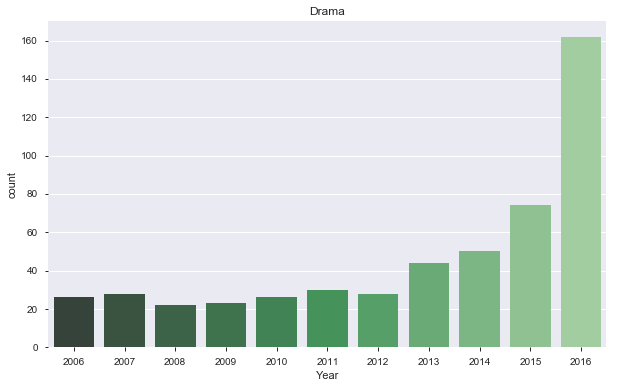

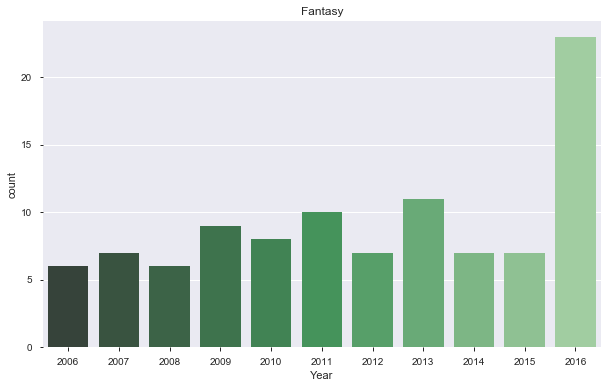

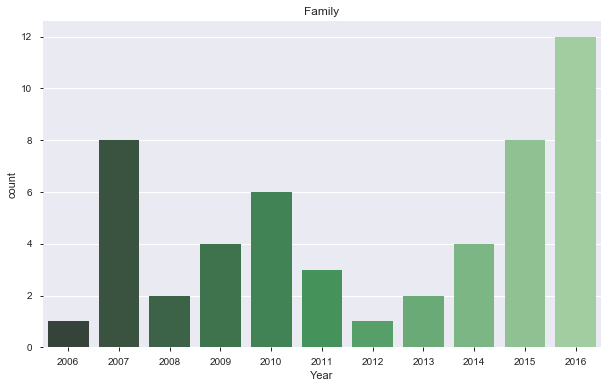

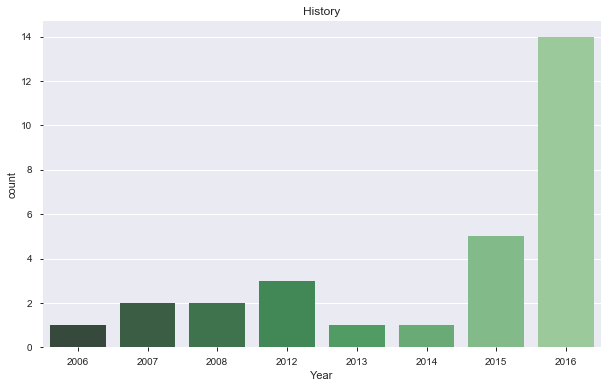

In [169]:
for genre in movies_genre2 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    print("The total number of ",genre,"::",len(Movies_1000_data[genre_df]))
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='Year', data=Movies_1000_data[genre_df], palette="Greens_d")
    plt.title(genre)

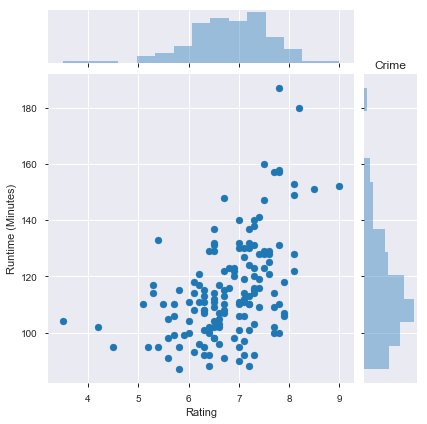

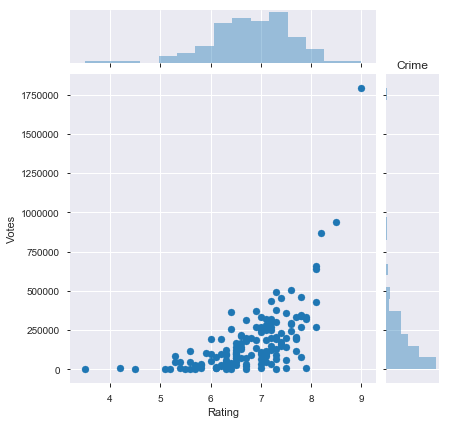

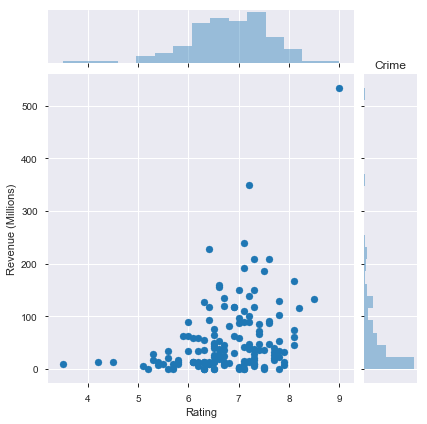

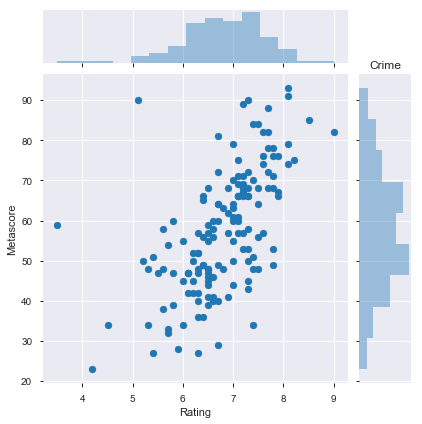

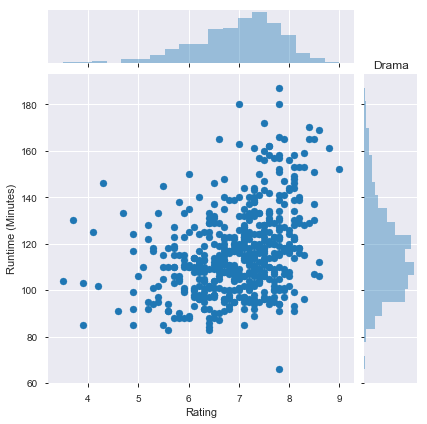

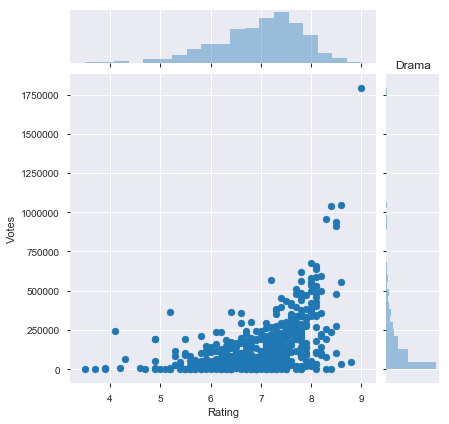

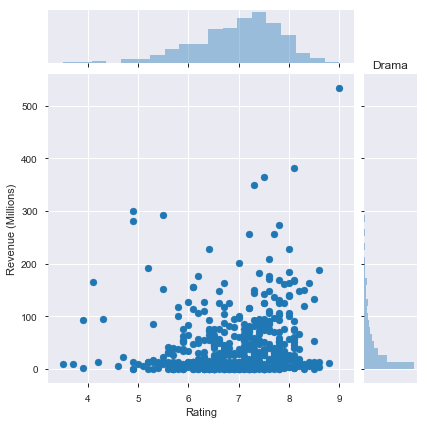

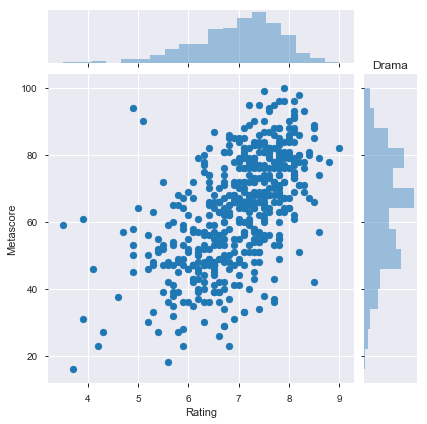

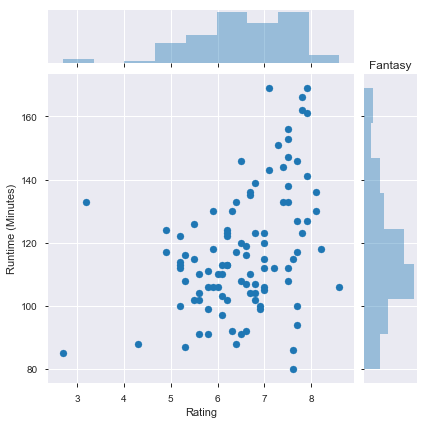

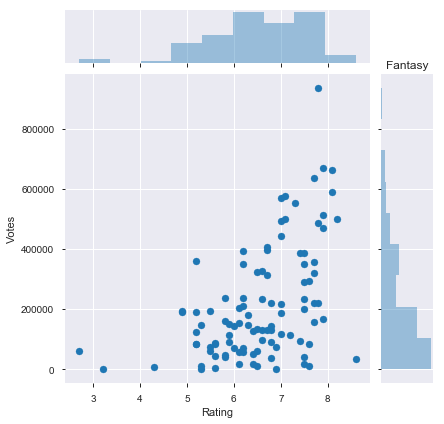

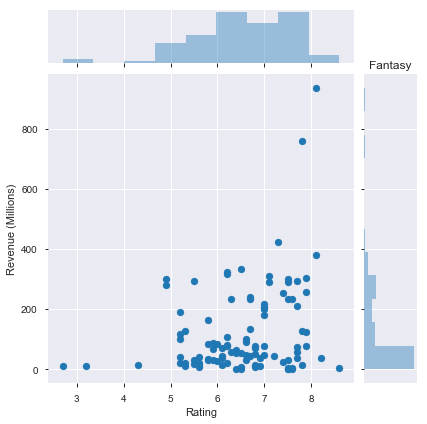

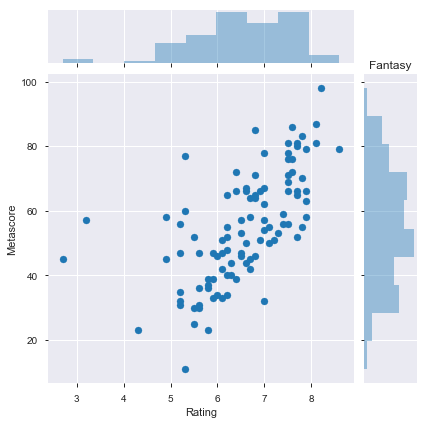

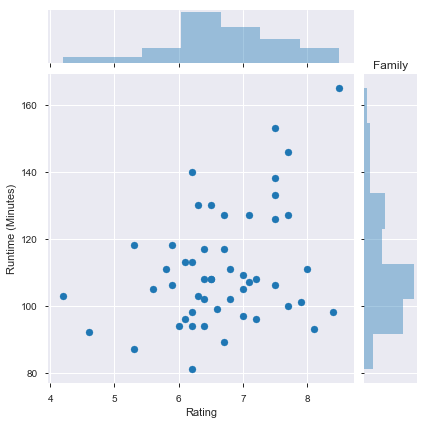

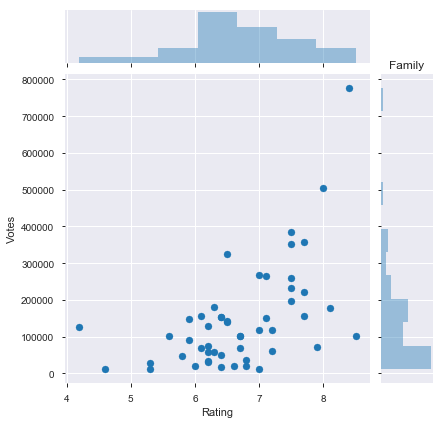

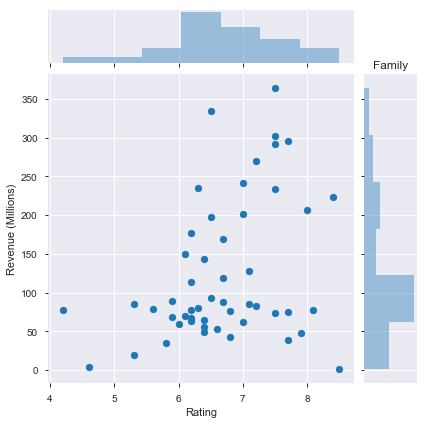

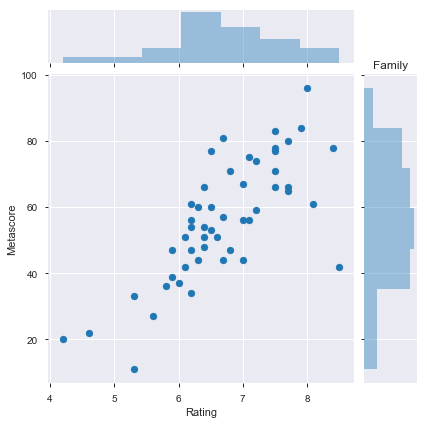

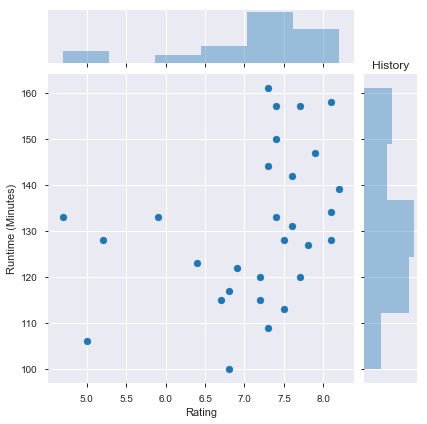

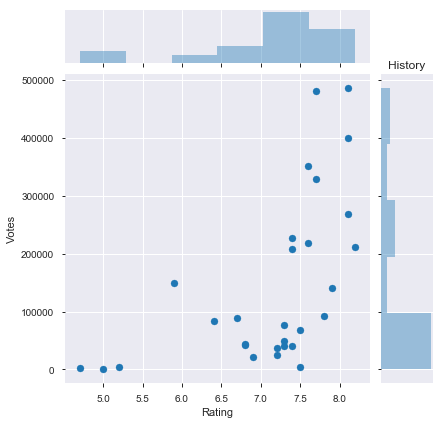

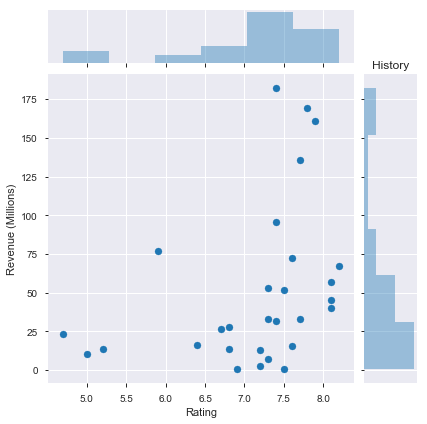

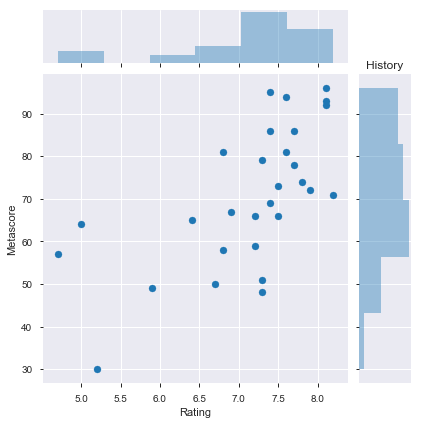

In [170]:
for genre in movies_genre2 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    compare_with_movies_rating = ['Runtime (Minutes)', 'Votes','Revenue (Millions)', 'Metascore']
    for compare in compare_with_movies_rating :  
        sns.jointplot(data=Movies_1000_data[genre_df], x='Rating', y=compare)
        plt.title(genre)

The total number of  Horror :: 119
The total number of  Music :: 21
The total number of  Musical :: 5
The total number of  Mystery :: 106
The total number of  Romance :: 141


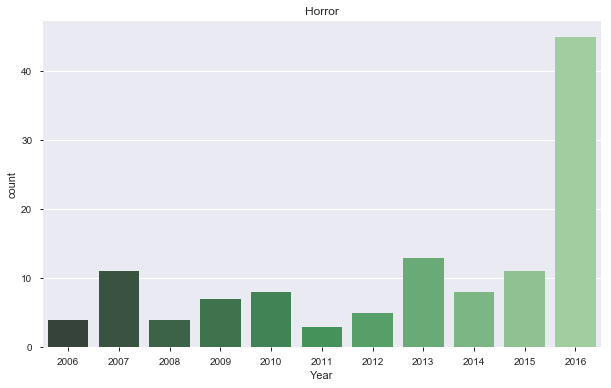

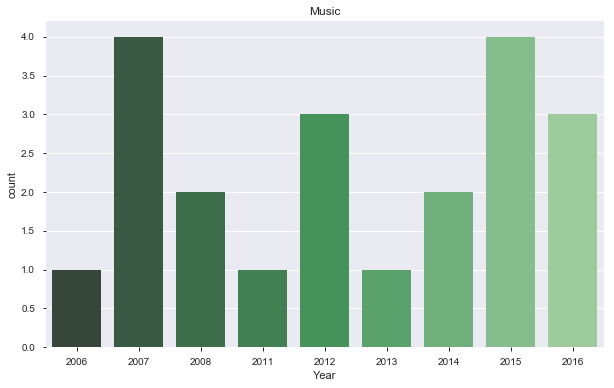

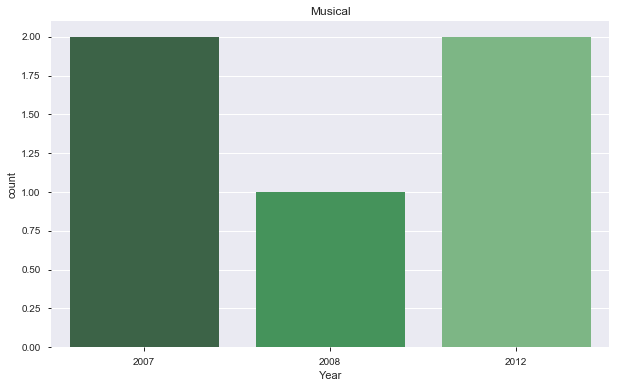

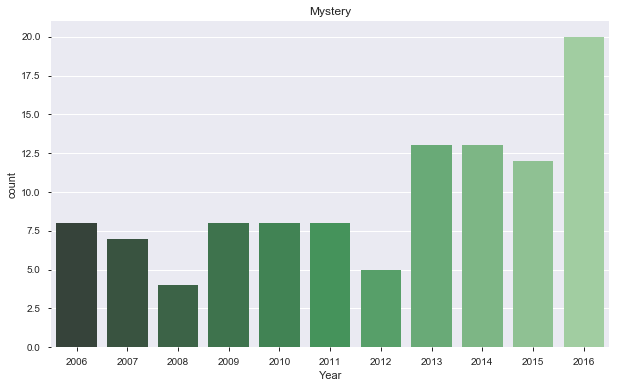

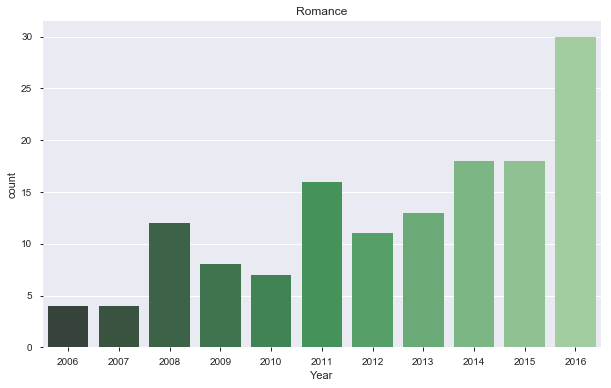

In [177]:
for genre in movies_genre3 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    print("The total number of ",genre,"::",len(Movies_1000_data[genre_df]))
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='Year', data=Movies_1000_data[genre_df], palette="Greens_d")
    plt.title(genre)

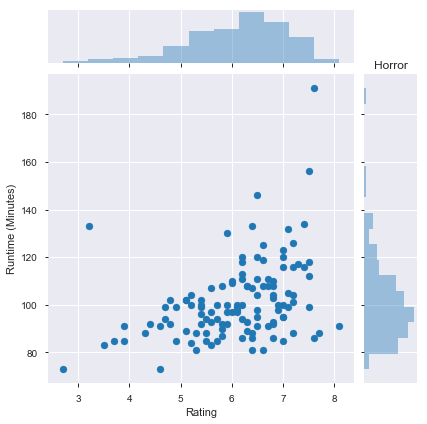

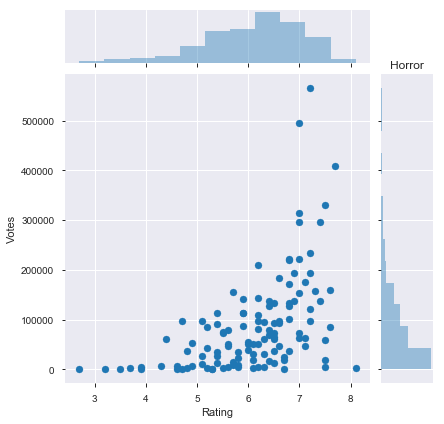

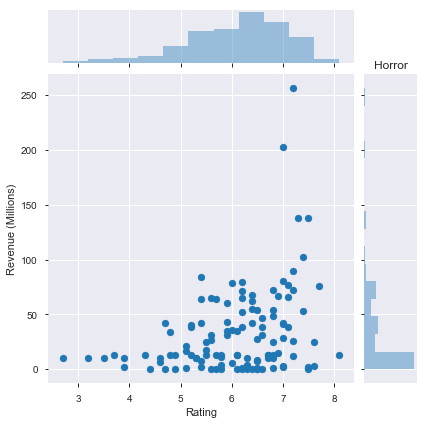

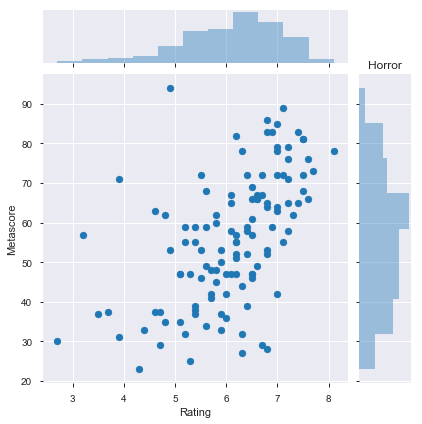

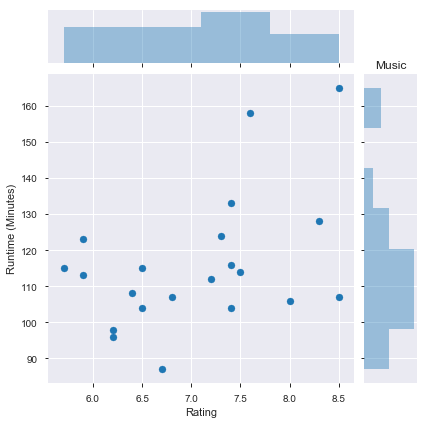

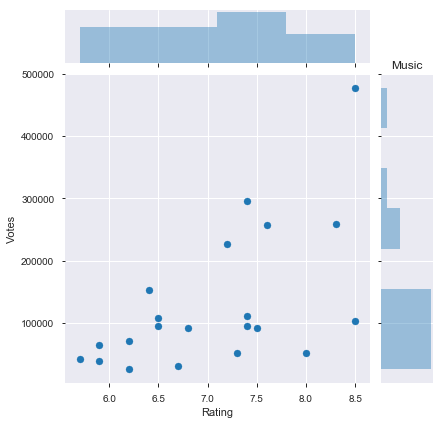

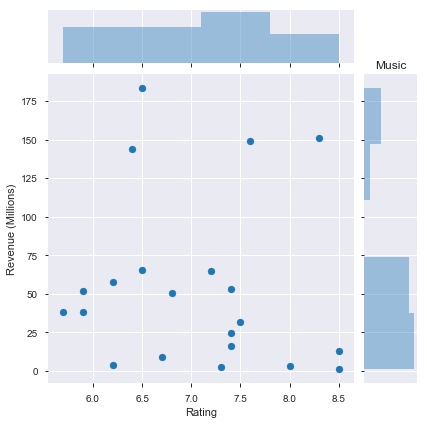

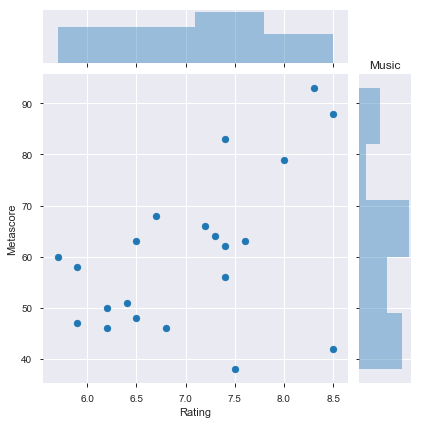

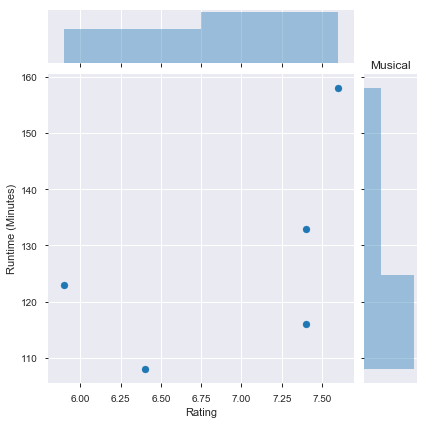

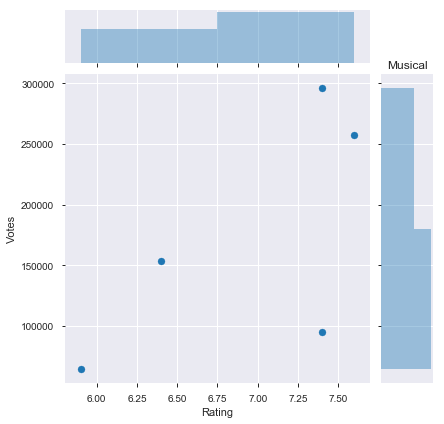

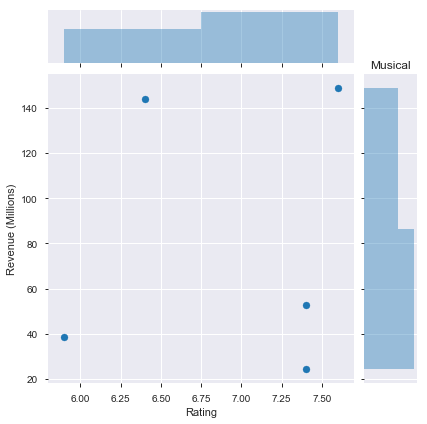

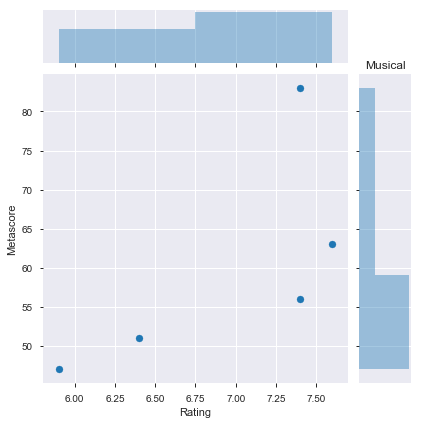

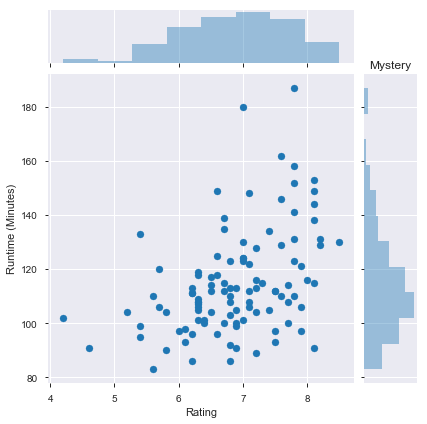

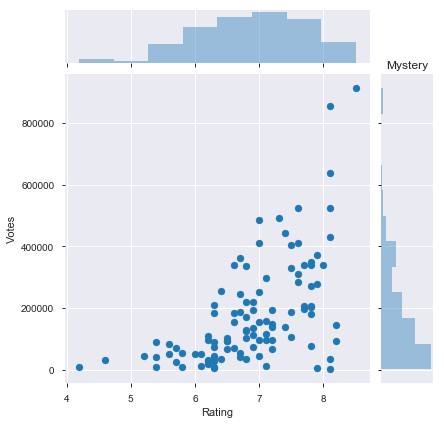

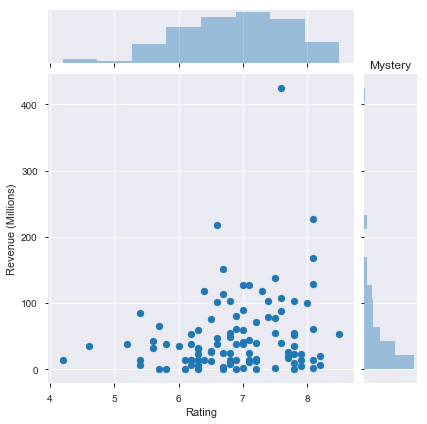

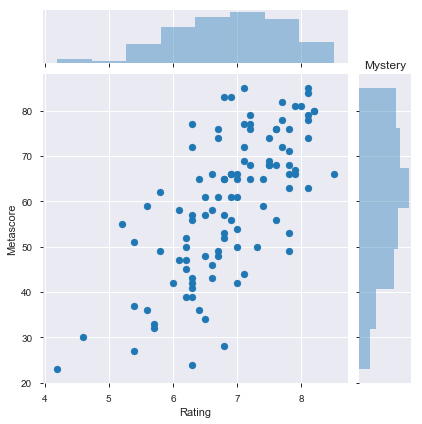

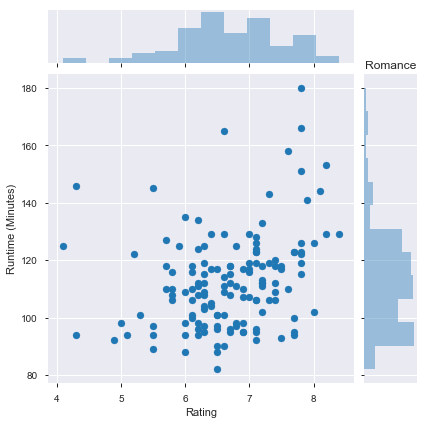

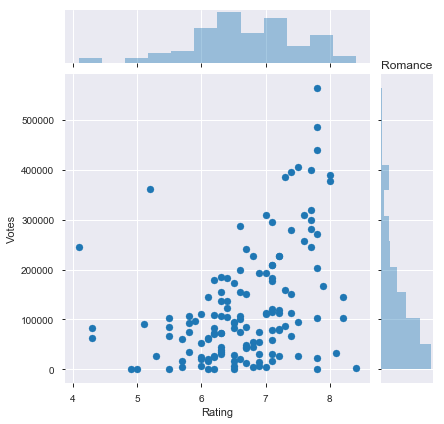

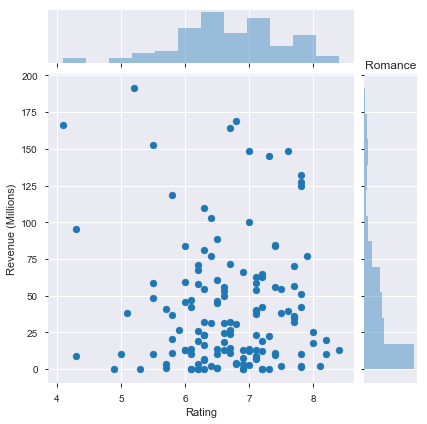

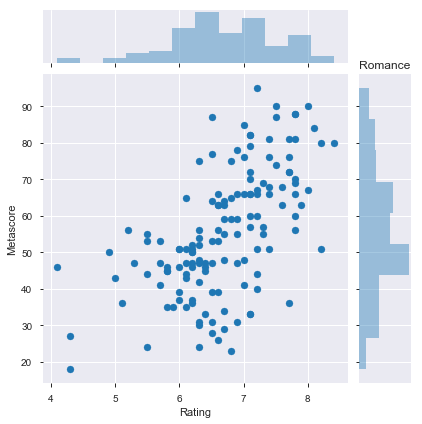

In [171]:
for genre in movies_genre3 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    compare_with_movies_rating = ['Runtime (Minutes)', 'Votes','Revenue (Millions)', 'Metascore']
    for compare in compare_with_movies_rating :  
        sns.jointplot(data=Movies_1000_data[genre_df], x='Rating', y=compare)
        plt.title(genre)

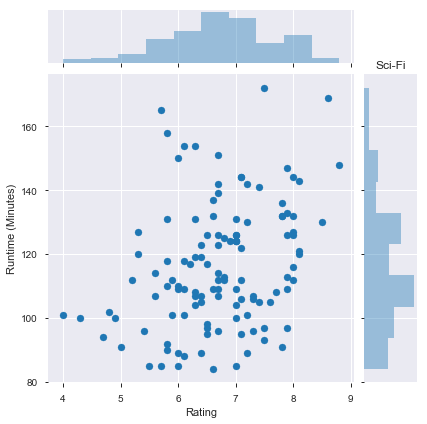

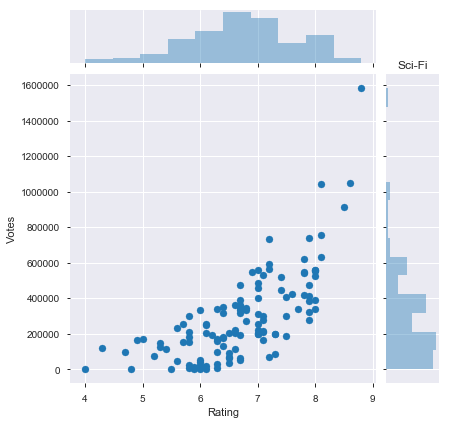

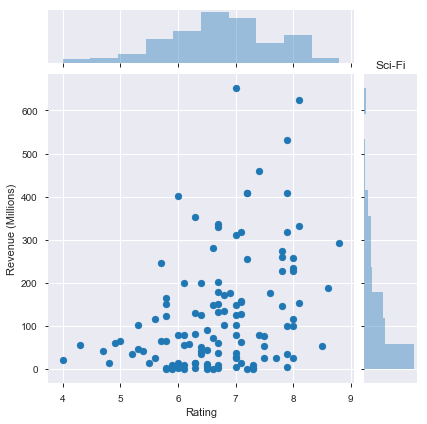

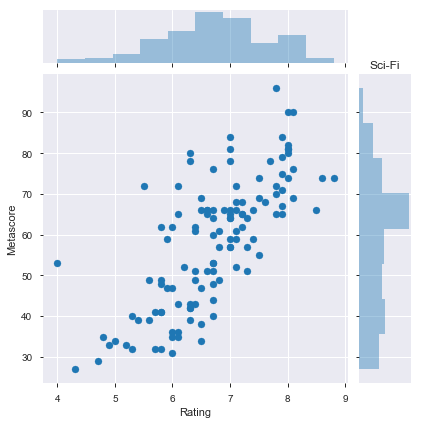

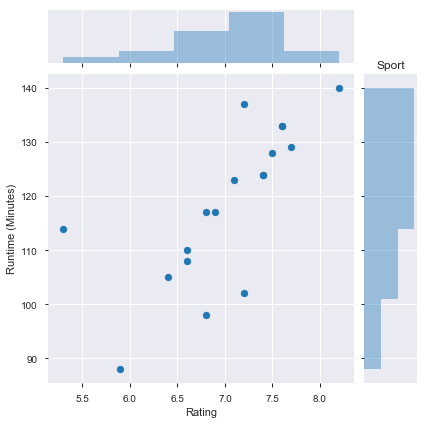

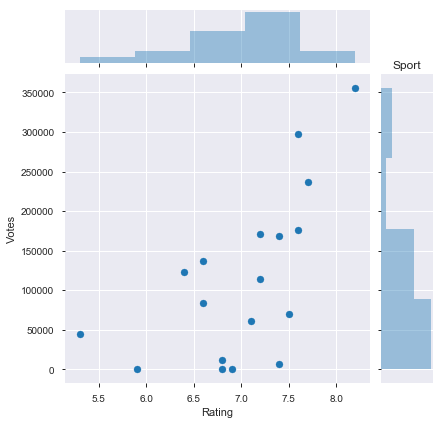

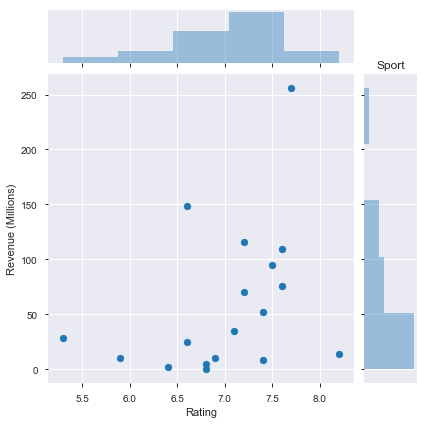

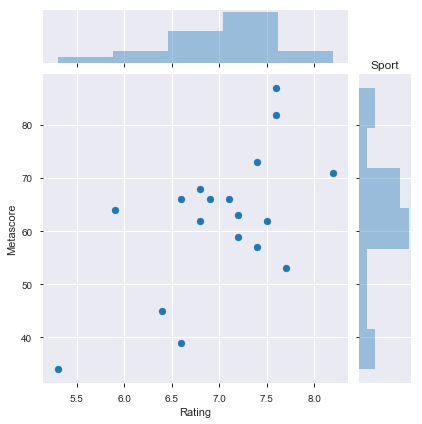

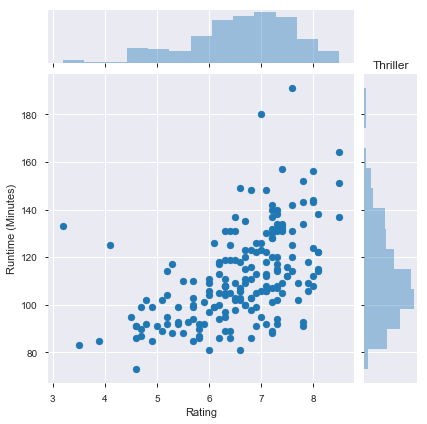

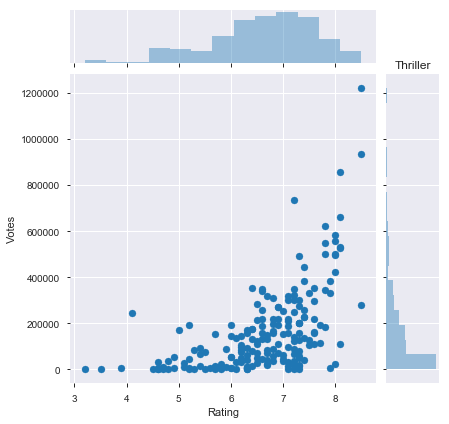

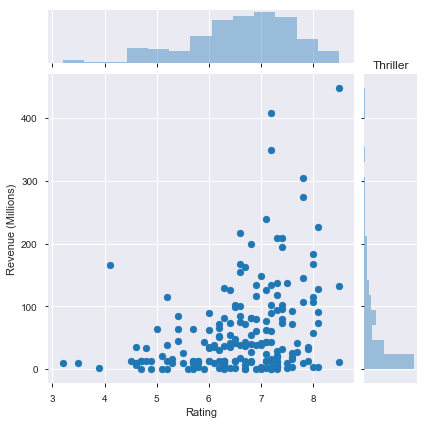

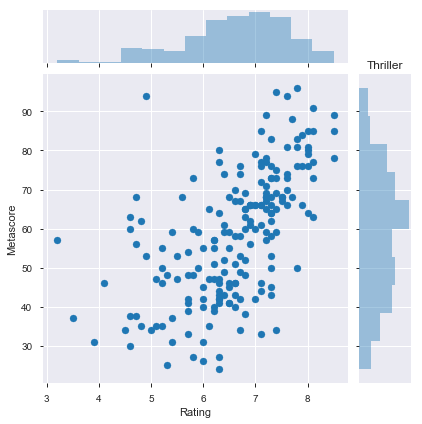

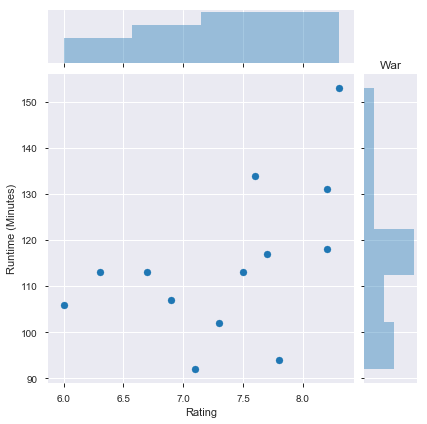

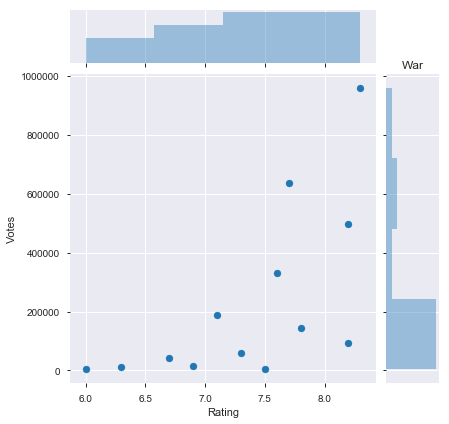

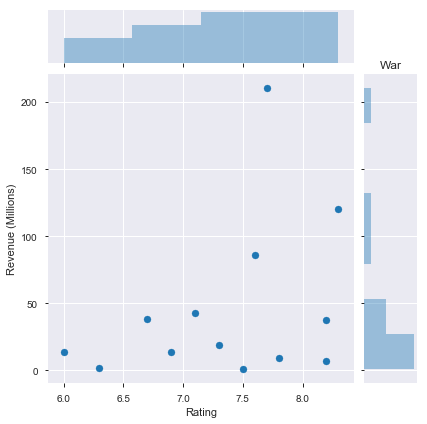

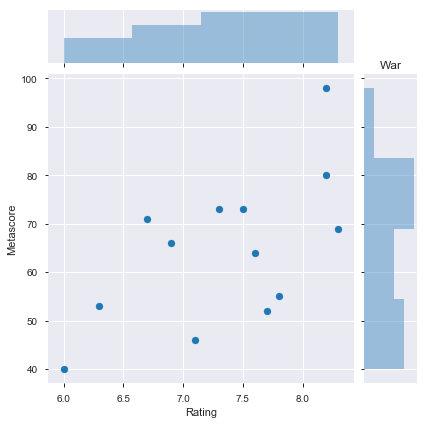

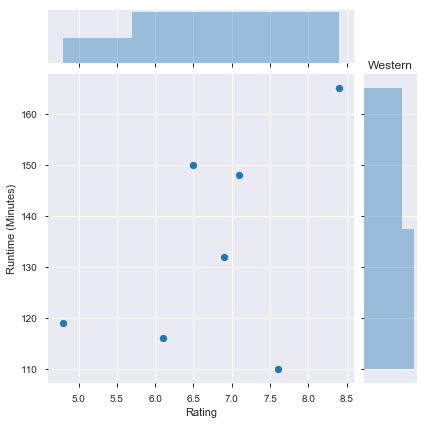

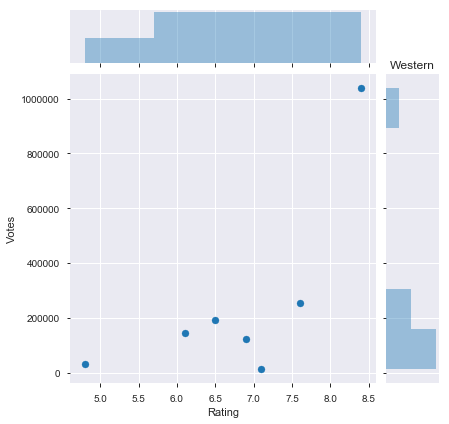

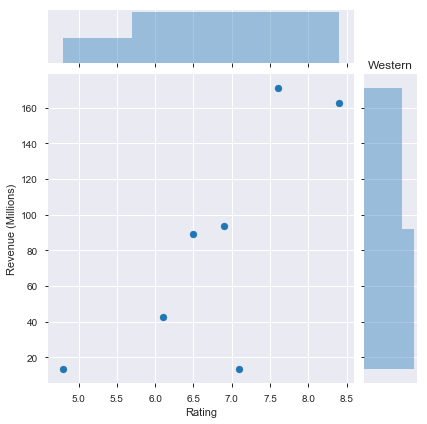

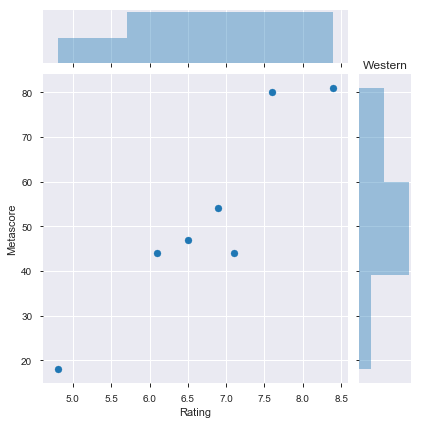

In [178]:
for genre in movies_genre4 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    compare_with_movies_rating = ['Runtime (Minutes)', 'Votes','Revenue (Millions)', 'Metascore']
    for compare in compare_with_movies_rating :  
        sns.jointplot(data=Movies_1000_data[genre_df], x='Rating', y=compare)
        plt.title(genre)

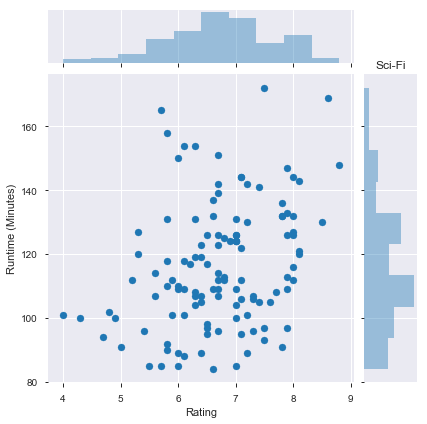

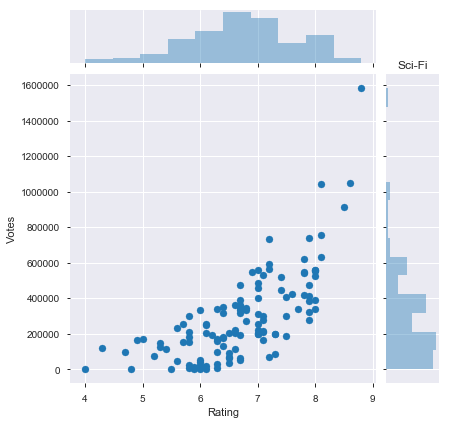

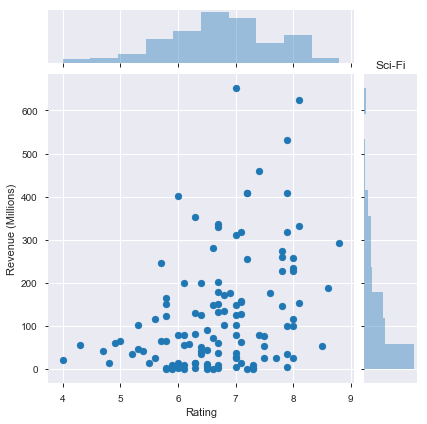

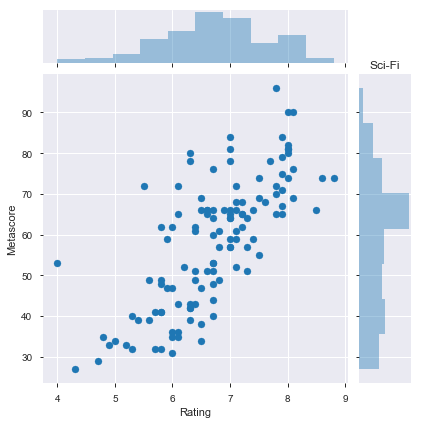

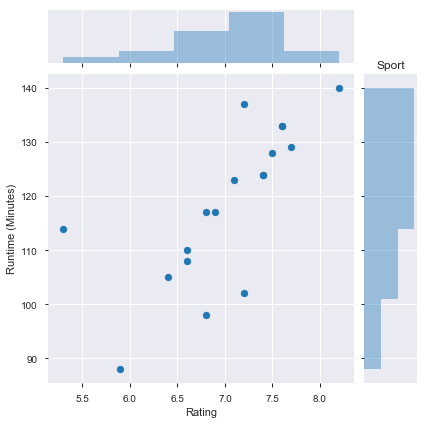

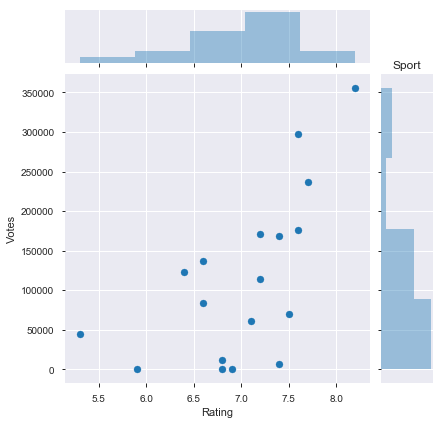

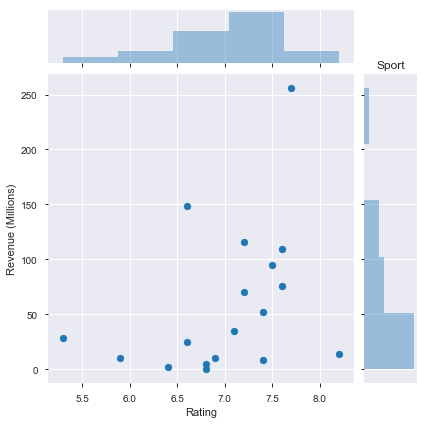

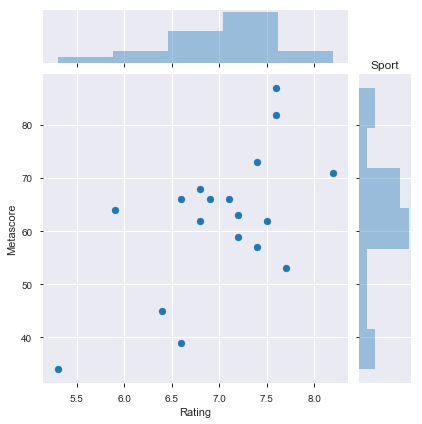

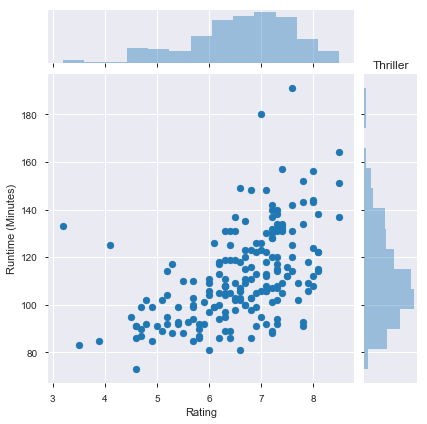

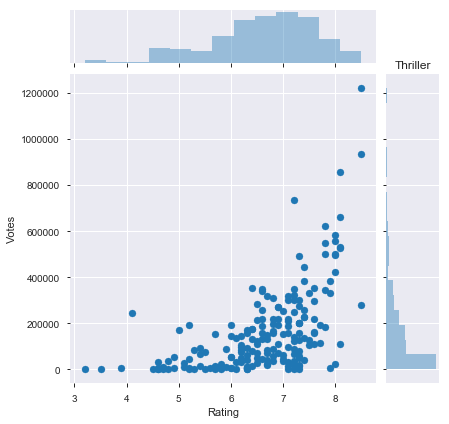

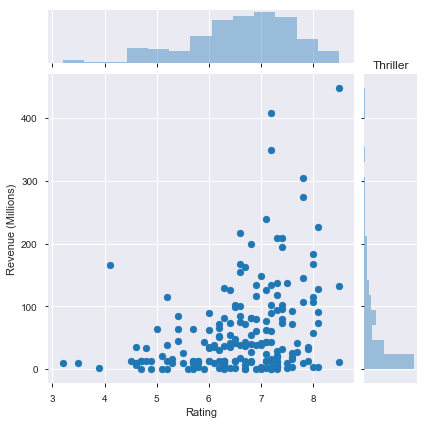

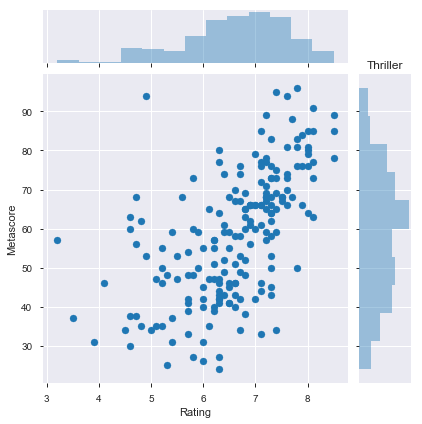

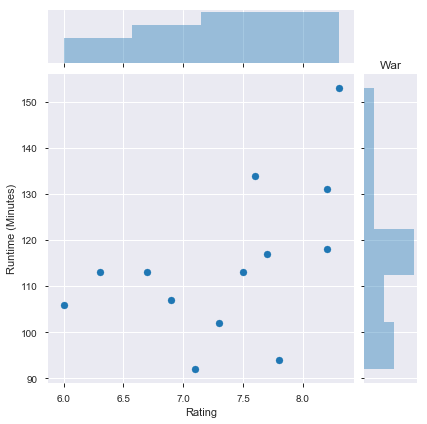

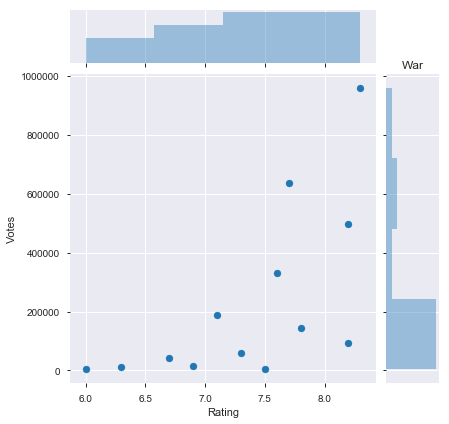

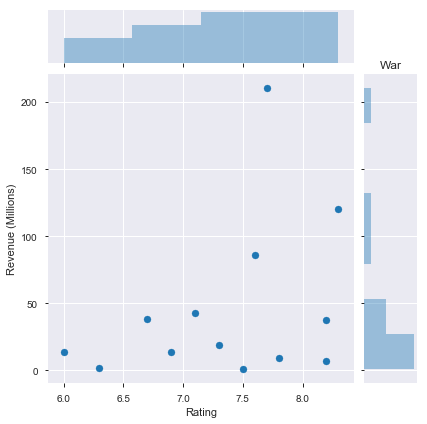

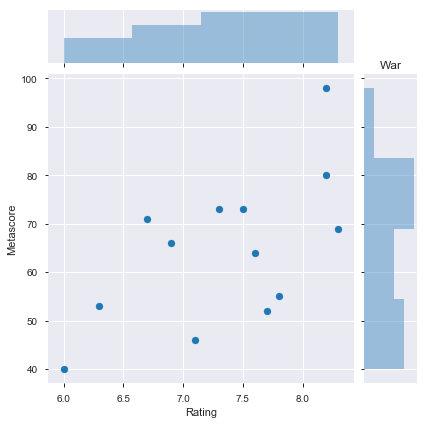

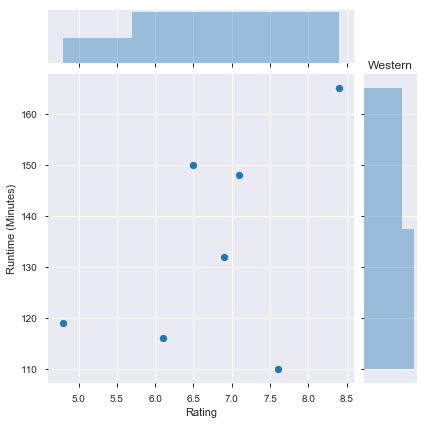

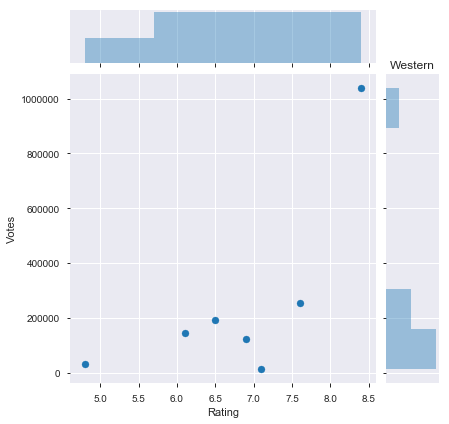

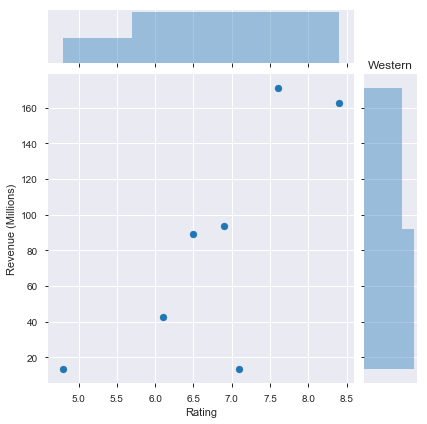

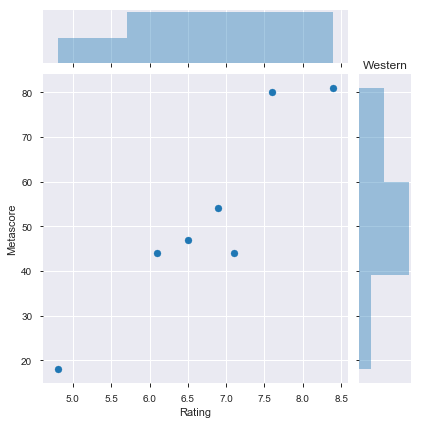

In [179]:
for genre in movies_genre4 :
    genre_df = Movies_1000_data['Genre'].str.contains(genre).fillna(False)
    compare_with_movies_rating = ['Runtime (Minutes)', 'Votes','Revenue (Millions)', 'Metascore']
    for compare in compare_with_movies_rating :  
        sns.jointplot(data=Movies_1000_data[genre_df], x='Rating', y=compare)
        plt.title(genre)

- Maximum movie released for all categories (genre) in 2016 and then 2015.
- Among all the categories highest number of movie released for Drama, the second highest category is Action and third highest category is Comedy. Also good number of movies released for Adventure and Thriller from 2006 to 2016.
- Runtime vs Rating graph - for these 5 movie category the most concentrated part is for rating 6/10 - 8/10 and runtime is 100 mins to 130mins mostly 
- Votes vs Rating graph -- for Drama, Action, Adventure, and Triller below 5 lakhs for comedy votes are below 4lakhs. In graph most concentrated part os 6/10 to 8/10 of the rating 
- Revenue vs Rating graph shows that mostly Action movies earned better revenue among al other categories, it earned mostly 200 million. For other category they earned below 100 million. 
- Metascore vs Rating graph shows that -- most concentarted part in the graph is 6/10 to 8/10 and metascore is mostly 40/100 to 80/100, except triller it is 50/100 to 70/100 


<a id=section406></a>
#### 4.6 Actor Analysis

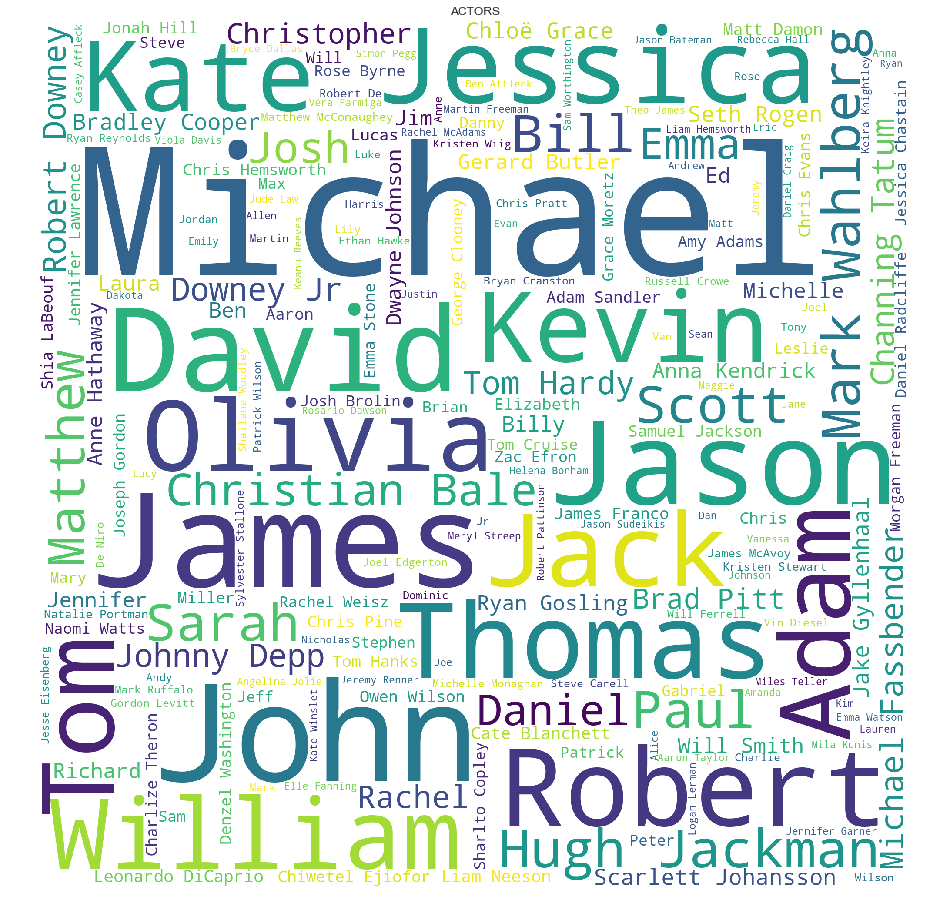

In [180]:
actors_names=Movies_1000_data["Actors"]
actors_set=set(actors_names)
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(16,16))
text = (str(actors_set))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=2000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('ACTORS')
plt.axis('off')
plt.show()

- In this graph we can see that, the size of the name the actors are showing the frequency of words in actors column in the data set. 

<a id=section407></a>
#### 4.7 Revenue Analysis for higher, medium and lower range

In [181]:
RevenueSorting = Movies_1000_data.sort_values(['Revenue (Millions)'], ascending=False)

In [197]:
#Top 5 revenues
RevenueSorting.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Rating_5
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,Rating_4
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,Rating_4
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,Rating_5
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Rating_5


- Revenue More than 500 million

In [199]:
Revenue_morethan_500 = RevenueSorting[RevenueSorting['Revenue (Millions)'] >500]
Revenue_morethan_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 50 to 12
Data columns (total 13 columns):
Rank                  6 non-null int64
Title                 6 non-null object
Genre                 6 non-null object
Description           6 non-null object
Director              6 non-null object
Actors                6 non-null object
Year                  6 non-null int64
Runtime (Minutes)     6 non-null int64
Rating                6 non-null float64
Votes                 6 non-null int64
Revenue (Millions)    6 non-null float64
Metascore             6 non-null float64
Rating_Range          6 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 672.0+ bytes


- There are 6 movies earned more that 500 millions

- Revenue between 300 to 500 million

In [212]:
Revenue_between_300_to_500 = RevenueSorting[(RevenueSorting['Revenue (Millions)'] >300) & (RevenueSorting['Revenue (Millions)'] <500) ]
Revenue_between_300_to_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 119 to 941
Data columns (total 13 columns):
Rank                  37 non-null int64
Title                 37 non-null object
Genre                 37 non-null object
Description           37 non-null object
Director              37 non-null object
Actors                37 non-null object
Year                  37 non-null int64
Runtime (Minutes)     37 non-null int64
Rating                37 non-null float64
Votes                 37 non-null int64
Revenue (Millions)    37 non-null float64
Metascore             37 non-null float64
Rating_Range          37 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 4.0+ KB


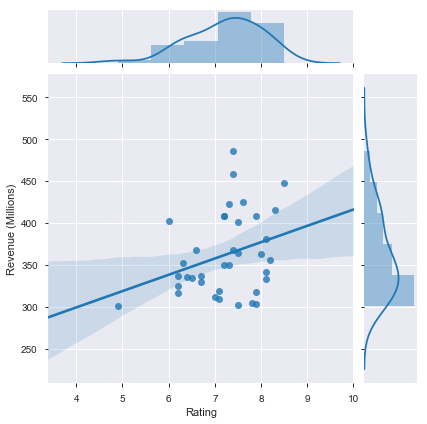

In [236]:
sns.jointplot(data = Revenue_between_300_to_500, x="Rating", y="Revenue (Millions)", kind='reg')

- The medium Revenue range, showing the rating range from 6/10 to 8/10 and most of the movies earned from 300 to 375 million, few of them above 400 million. 

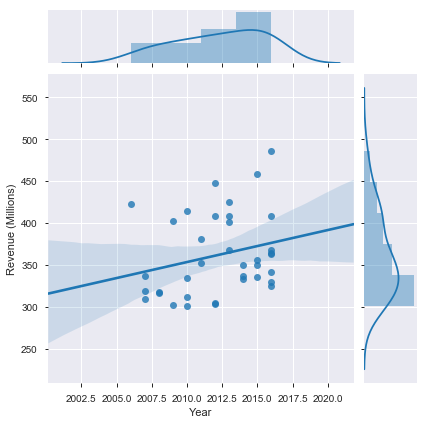

In [215]:
sns.jointplot(data = Revenue_between_300_to_500, x="Year", y="Revenue (Millions)", kind='reg')

- The medium Revenue range, showing that for the year range from 2006 to 2016, most of the movies earned frrom 300 to 375 million, few of them above 400 million. 

- Revenue with lower range

In [216]:
Revenue_lessthan_300 = RevenueSorting[(RevenueSorting['Revenue (Millions)'] <300)]
Revenue_lessthan_300.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 418 to 231
Data columns (total 13 columns):
Rank                  957 non-null int64
Title                 957 non-null object
Genre                 957 non-null object
Description           957 non-null object
Director              957 non-null object
Actors                957 non-null object
Year                  957 non-null int64
Runtime (Minutes)     957 non-null int64
Rating                957 non-null float64
Votes                 957 non-null int64
Revenue (Millions)    957 non-null float64
Metascore             957 non-null float64
Rating_Range          957 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 104.7+ KB


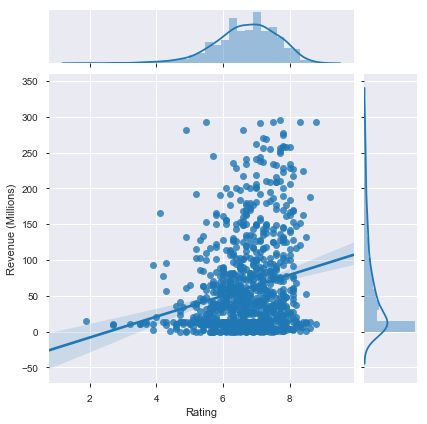

In [219]:
sns.jointplot(data = Revenue_lessthan_300, x="Rating", y="Revenue (Millions)", kind='reg')

-- There are 957 movies comes under the lower Revenue range, showing most concentrated part is for the rating range from 6/10 to 8/10, however most of the movies earned from 10 to 100 million, few of them between 100 to 200 million, and very few are above 200 million. 

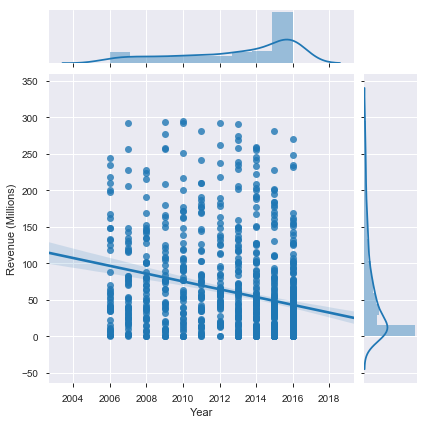

In [237]:
sns.jointplot(data = Revenue_lessthan_300, x="Year", y="Revenue (Millions)", kind='reg')

- The lower Revenue range, showing most concentrated part is for the rating range from 2006 to 2016, however most of the movies earned below 100 million, few of them between 100 to 200 million, and very few are above 200 million.

In [235]:
Revenue_lessthan_300_sorting = Revenue_lessthan_300.sort_values('Rating' , ascending= False)
Revenue_lessthan_300_sorting[(Revenue_lessthan_300_sorting['Rating'] >6)&(Revenue_lessthan_300_sorting['Rating'] <9)].count()

Rank                  749
Title                 749
Genre                 749
Description           749
Director              749
Actors                749
Year                  749
Runtime (Minutes)     749
Rating                749
Votes                 749
Revenue (Millions)    749
Metascore             749
Rating_Range          749
dtype: int64

- There are major number of  movies (749) below 300 million, even they got Rating from 6 to 8.5 and good Metascore, they able to earn from 10 million to 150 million. 

<a id=section408></a>
#### 4.8 Runtime Analysis

In [240]:
Movies_1000_data['Runtime (Minutes)'].value_counts()

108    31
100    28
117    27
110    26
106    26
118    26
102    25
112    24
104    23
123    23
92     22
98     22
95     22
101    22
113    22
111    22
97     22
115    21
107    20
94     20
109    19
120    19
96     19
105    17
119    17
114    17
116    17
99     16
88     15
124    14
       ..
150     4
151     4
153     4
135     4
157     3
147     3
180     3
169     3
142     3
162     3
161     3
84      3
152     2
80      2
149     2
73      2
154     2
156     2
82      1
191     1
187     1
145     1
159     1
160     1
163     1
164     1
166     1
170     1
172     1
66      1
Name: Runtime (Minutes), Length: 94, dtype: int64

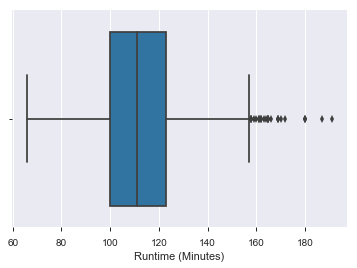

In [241]:
Runtime_Box = Movies_1000_data['Runtime (Minutes)']
sns.boxplot(Runtime_Box)

- Most of the movies run time is from 100 minutes to 120 minutes.

<a id=section409></a>
#### 4.9 Director Analysis

In [300]:
#Movies_1000_data[Movies_1000_data['Director'].count() == ]
Director_count = Movies_1000_data['Director'].value_counts()
Director_count

Ridley Scott            8
David Yates             6
Paul W.S. Anderson      6
M. Night Shyamalan      6
Michael Bay             6
Denis Villeneuve        5
J.J. Abrams             5
Christopher Nolan       5
Zack Snyder             5
Peter Berg              5
Danny Boyle             5
Antoine Fuqua           5
David Fincher           5
Martin Scorsese         5
Woody Allen             5
Justin Lin              5
Clint Eastwood          4
Quentin Tarantino       4
Guy Ritchie             4
Peter Jackson           4
Ron Howard              4
Jon Favreau             4
Lars von Trier          4
Adam McKay              4
James Wan               4
David O. Russell        4
Alexandre Aja           4
D.J. Caruso             4
Joe Wright              4
Tim Burton              4
                       ..
Colm McCarthy           1
Stephen Fingleton       1
Courtney Hunt           1
Lee Unkrich             1
Femi Oyeniran           1
Mark Andrews            1
Kyle Patrick Alvarez    1
Zackary Adle

- Filtering out directors who released number movies from 5 to 8

In [296]:
g_director = Movies_1000_data.groupby('Director')
Group_Director_1 = g_director.filter(lambda x: (len(x) >= 5) & (len(x) <= 8)) 
Group_Director_1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Rating_4
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Rating_4
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Rating_4
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0,Rating_4
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Rating_3
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Rating_5
38,39,The Magnificent Seven,"Action,Adventure,Western",Seven gunmen in the old west gradually come to...,Antoine Fuqua,"Denzel Washington, Chris Pratt, Ethan Hawke,Vi...",2016,132,6.9,122853,93.38,54.0,Rating_4
48,49,Star Trek Beyond,"Action,Adventure,Sci-Fi",The USS Enterprise crew explores the furthest ...,Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...",2016,122,7.1,164567,158.80,68.0,Rating_4
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Rating_5
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Rating_5


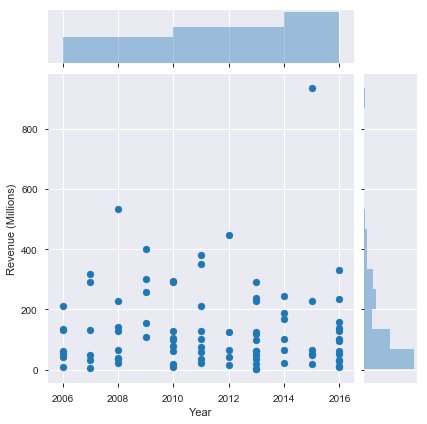

In [297]:
sns.jointplot(data=Group_Director_1, x='Year',y='Revenue (Millions)')

- Mostly they earn the revenue <200 millions and few of them earned below 400 million
- but in 2015 J.J. Abrams crossed all the records and for his movie **Star Wars: Episode VII - The Force Awakens**, he eaned    revenue of 936 millions

In [303]:
Group_Director_1[Group_Director_1['Director'] == 'J.J. Abrams']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Rating_5
140,141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0,Rating_4
362,363,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",After the crew of the Enterprise find an unsto...,J.J. Abrams,"Chris Pine, Zachary Quinto, Zoe Saldana, Bened...",2013,132,7.8,417663,228.76,72.0,Rating_4
497,498,Super 8,"Mystery,Sci-Fi,Thriller","During the summer of 1979, a group of friends ...",J.J. Abrams,"Elle Fanning, AJ Michalka, Kyle Chandler, Joel...",2011,112,7.1,298913,126.98,72.0,Rating_4
869,870,Mission: Impossible III,"Action,Adventure,Thriller",Agent Ethan Hunt comes into conflict with a da...,J.J. Abrams,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph...",2006,126,6.9,270429,133.38,66.0,Rating_4


- Filtering out directors who released number movies from 3 to 5

In [298]:
Group_Director_2 = g_director.filter(lambda x: (len(x) >= 3) & (len(x) < 5)) 
Group_Director_2

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Rating_5
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Rating_3
17,18,Jason Bourne,"Action,Thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,58.0,Rating_4
24,25,Independence Day: Resurgence,"Action,Adventure,Sci-Fi",Two decades after the first Independence Day i...,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman,Ma...",2016,120,5.3,127553,103.14,32.0,Rating_3
32,33,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",After the re-emergence of the world's first mu...,Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",2016,144,7.1,275510,155.33,52.0,Rating_4
43,44,The Founder,"Biography,Drama,History","The story of Ray Kroc, a salesman who turned t...",John Lee Hancock,"Michael Keaton, Nick Offerman, John Carroll Ly...",2016,115,7.2,37033,12.79,66.0,Rating_4
59,60,Sully,"Biography,Drama","The story of Chesley Sullenberger, an American...",Clint Eastwood,"Tom Hanks, Aaron Eckhart, Laura Linney, Valeri...",2016,96,7.5,137608,125.07,74.0,Rating_4
65,66,Kingsman: The Secret Service,"Action,Adventure,Comedy","A spy organization recruits an unrefined, but ...",Matthew Vaughn,"Colin Firth, Taron Egerton, Samuel L. Jackson,...",2014,129,7.7,440209,128.25,58.0,Rating_4
71,72,Allied,"Action,Drama,Romance","In 1942, a Canadian intelligence officer in No...",Robert Zemeckis,"Brad Pitt, Marion Cotillard, Jared Harris, Vin...",2016,124,7.1,78079,40.07,60.0,Rating_4
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy","Captain Barbossa, Will Turner and Elizabeth Sw...",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.40,50.0,Rating_4


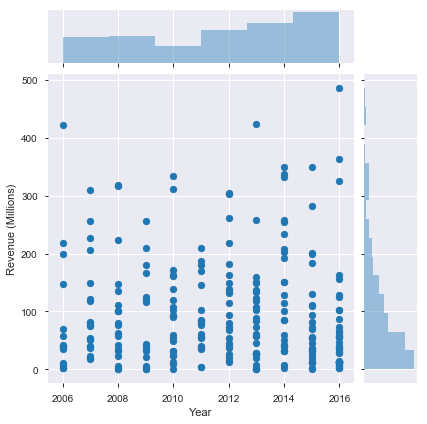

In [299]:
sns.jointplot(data=Group_Director_2, x='Year',y='Revenue (Millions)')

- Mostly they earn the revenue <200 millions and few of them earned from 200 to 300 million and very vey few from 300 to 400

- Filtering out directors who released number movies from 1 to 2

In [301]:
Group_Director_3 = g_director.filter(lambda x: (len(x) <= 1) & (len(x) < 2)) 
Group_Director_3

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Range
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Rating_4
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Rating_3
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,13.37,71.0,Rating_3
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Rating_4
11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.27,74.0,Rating_4
14,15,Colossal,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0,Rating_3
15,16,The Secret Life of Pets,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0,Rating_4
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0,Rating_5
20,21,Gold,"Adventure,Drama,Thriller","Kenny Wells, a prospector desperate for a luck...",Stephen Gaghan,"Matthew McConaughey, Edgar Ramírez, Bryce Dall...",2016,120,6.7,19053,7.22,49.0,Rating_4
21,22,Manchester by the Sea,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.70,96.0,Rating_4


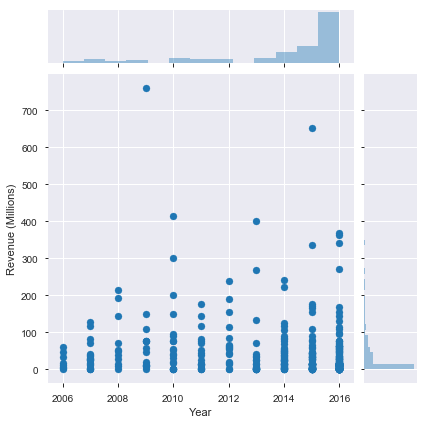

In [302]:
sns.jointplot(data=Group_Director_3, x='Year',y='Revenue (Millions)')

- Mostly they earn the revenue below 100 millions and few of them earned from 100 to 200 million. 
- In the year 2009 James Cameron earned the revenue 760 million for his movie Avatar, this movie got critics rating 83/100.
- In the year 2015 Colin Trevorrow earned 652 millon for his movie Jurassic World, this movie got the critics rating 59/100.

<a id=section5></a>
## 5. Conclusion

##### This study through a large volume of data, allowed me to determine the following points for movies between 2000 and 2016:
- Audience ratings of the movies are quite close to the critics ratings for most of the movies but for few of the movies the rating differences are present for audience and those to critics. 
- From the distribution, we can see in most of the cases if audience is happy they give rating 7/10, the audience rating curve is leptokurtic. 
- Critics are not giving higher rating to all the movies, the curve for the critics rating is mesokurtic. Critics rate more severely than the public.
- Most movies last between 80 minutes and 140 minutes
- Mostly movies that are well rated by public and critics make the most money. 
- The more the public appreciates a film, the more they vote and give a good rating
- Maximum movie relased for all categories (genre) in 2016 and then 2015.
- Among all the categories heighest number of movie released for Drama, the second highest category is Action and third highest category is Comedy. Also good number of movies released for Adventure and Thriller from 2006 to 2016.
- Drama, Action, Comedy, Adventure, Thriller, Crime are highest rated movies from public. 
- Mostly Action movies earned better revenue among all other categories. 